# Methods for Data Science: Course Work 1

## Task 1:  Regression (50 marks)



## 1.1 Linear regression (8 marks)  

##1.1.1

In [1]:
# First I import the packages that I need in this coursework below
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

From the question, we know our loss function:
$$L(\beta) = \frac{1}{2N}||y - X\beta- \beta_0||^2$$
If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$ by hstack 1 horizontally, we can write the new estimate parameters as 
$$
 \boldsymbol\beta_{\text{aug}} = \begin{bmatrix}
\beta_0\\
\boldsymbol\beta_1
\end{bmatrix}\,.
$$
Then our loss function becomes:
$$L(\beta_{aug}) = \frac{1}{2N}||y -  X_{aug}\beta_{aug}||^2$$

From our lectures, we know that the parameters $\beta_{aug}$ found by minimizing the loss equation:

1. We get $\nabla_{\beta_{aug}} L|_{\beta^*} = -\frac{1}{N}[X_{aug}^Ty - X_{aug}^TX_{aug}\beta_{aug}] = 0$

2. Then we get $\beta^* = (X_{aug}^TX_{aug})^{-1}X_{aug}^Ty$, and the first entry in $\beta^*$ is our $\beta_0$



From lectures, to determine how well the prediction was, let us determine the $R^2$ score. The labels of the test set will be called $y$ and the predictions on the test data $\hat{y}$.
$$
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} \, ,
$$
where $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$. 

$R^2$ score measures the variation in the data explained by the fitted relationship. $R^2$ score closer to 1 means better prediction.

In [2]:
#beta predict by minimum the loss function
def min_loss_estimate_aug(X_aug, y):
    '''
    Want to get the predicted beta by OLS
        X_aug: hstack one column 1 shape(N, D+1)
        y: output shape (N,) 
    return: predicted beta
    '''

    N, D = X_aug.shape
    beta_aug_ml = np.linalg.solve(X_aug.T @ X_aug, X_aug.T @ y) ## This is our predicted beta
    
    return beta_aug_ml

#y predict
def predict_with_estimate(X_test, beta):
    
    # X_test: K x D matrix of test inputs
    # beta: D x 1 vector of parameters
    # returns: prediction of f(X_test); K x 1 vector
    
    prediction = X_test @ beta ## our linear regression model
    
    return prediction
 
# MSE error by formula
def MSE(y_original, y_predict):
    '''
    want to calculate mean square error
        y_original: the true value of y
        y_predict: the predicted y
    return: MSE of y and predict y
    '''
    
    mse = np.mean((y_original - y_predict)**2)
    
    return mse

# R2 score by formula
def r2_score(y_test, y_pred):
    '''
    want to calculate r2 score
        y_test: the true value of y
        y_pred: the predicted y
    return: MSE of y and predict y
    '''
    numerator = np.sum((y_test - y_pred)**2) 
    y_avg = np.mean(y_test) 
    denominator = np.sum((y_test - y_avg)**2) 
    
    return 1 - numerator/denominator 

# define the standardise function
def standardise(X):
    '''
    want to standardise X
        X: input data
    return standardised X, mu and sigma, because we want to use same mu and sigma with train data in the test data
    '''
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std = (X - mu) / sigma 
    return X_std, mu, sigma 

First, I read the data by $pd.read\_csv()$ and use $.to\_numpy()$ to change the data to numpy array. If we want to predict the 'Sound Presure', it becomes the output y, and the other 6 features(columns) become the input X. The size of X is $3890\times 6$, the size of $X_{aug}$ later will be $3890\times 7$. From the data, we can see some inputs are large and some are small, so we need to standardise inputs X to get the predict beta with suitable magnitude.

In [3]:
data_original = pd.read_csv("airfoil_noise_samples.csv")
data_samples = data_original.to_numpy()
data_original # view the original data

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
0,2175.611424,15.138865,21.075119,0.088194,66.764401,0.044771,122.365215
1,2962.923620,13.400893,13.200889,0.048462,78.221903,0.011041,129.296236
2,4430.810843,2.164599,13.959536,0.226743,57.053201,0.011499,121.827380
3,4939.695645,13.857682,18.203793,0.021705,23.896377,0.021475,114.998132
4,2193.979785,9.298757,11.007713,0.052737,38.917034,0.001741,125.639641
...,...,...,...,...,...,...,...
3885,3905.607276,9.799786,11.765429,0.028704,67.798053,0.004488,125.085653
3886,64.227331,2.707020,14.811376,0.235426,31.178047,0.001760,123.172927
3887,3284.747651,0.569689,0.340812,0.040439,49.229545,0.002682,134.214100
3888,5335.315242,5.525639,15.952651,0.197330,31.902680,0.008405,116.550551


In [4]:
# get the variables X and y
X_in = data_samples[:,:-1] # this is the other 6 columns as input x
y_out = data_samples[:,-1] # this is the Sound Pressure as output y
N, D = X_in.shape
X_std, mu, sigma = standardise(X_in)
X_aug = np.hstack([np.ones((N,1)), X_std]) # augmented training inputs of size N x (D+1)
beta_aug = np.zeros((D+1, 1)) # new beta vector of size (D+1) x 1

First I get the inferred value of $\beta$. And then I make a prediction using the $\beta$ that we just found. And get the in-sample MSE and R2 sore by function we defined above for the dataset.

In [5]:
# get the inferred value of beta
beta_aug_ml = min_loss_estimate_aug(X_aug, y_out)
print('Computed beta_ml:', beta_aug_ml)

# make a prediction using the beta that we just found.
y_predict = predict_with_estimate(X_aug, beta_aug_ml)
print('Predict Sound Pressure:', y_predict)

# get MSE by MSE function
MSE_train = MSE(y_out, y_predict)
print(r'In-sample MSE:',MSE_train)

# get R2 score by r2_score funtion
R2_train = r2_score(y_out, y_predict)
print(r'In-sample R2 score:', R2_train)

Computed beta_ml: [ 1.23970283e+02 -3.57549693e+00  8.34478004e-01 -3.92864721e+00
 -7.83341979e-02  1.72495668e+00 -1.35633979e-02]
Predict Sound Pressure: [121.31835074 127.90696136 121.3278463  ... 133.30829137 116.38912363
 126.5047115 ]
In-sample MSE: 1.8755566396402021
In-sample R2 score: 0.9177343977263077


#### report of 1.1.1: 
By analytical solution, I can get the predict $\beta$ [ 1.23970283e+02, -3.57549693e+00,  8.34478004e-01, -3.92864721e+00,
 -7.83341979e-02,  1.72495668e+00, -1.35633979e-02]. Here, the first value 1.23970283e+02 is the intercept, and from the sign, we can deduce: frequency, displacement, chord length, thickness have negative relevance with sound pressure, while the other features have positive relavance.

## 1.1.2

I first load the out of sample data and change them same as before. 

In [6]:
data_original_test = pd.read_csv("airfoil_noise_test.csv")
data_test = data_original_test.to_numpy()
# Variables 
X_in_test = data_test[:,:-1] # this is the other 6 columns as input x
y_out_test = data_test[:,-1] # this is the sound pressure as output y
N, D = X_in_test.shape
X_std_test = (X_in_test - mu)/sigma
X_aug_test = np.hstack([np.ones((N,1)), X_std_test]) # augmented training inputs of size N x (D+1)
beta_aug_test = np.zeros((D+1, 1)) # new beta vector of size (D+1) x 1

In [7]:
# make a prediction using the beta that we just found.
y_predict_test = predict_with_estimate(X_aug_test, beta_aug_ml)
print('Predict Sound Pressure:', y_predict_test)

# get MSE by MSE function
MSE_test = MSE(y_out_test, y_predict_test)
print(r'Out-of-sample MSE:',MSE_test)
print(r'In-sample MSE:',MSE_train)

# get R2 score by r2_score funtion
R2_test = r2_score(y_out_test, y_predict_test)
print(r'Out-of-sample R2 score:', R2_test)
print(r'In-sample R2 score:', R2_train)

Predict Sound Pressure: [124.97675111 122.52112271 132.02014099 126.84412408 124.12201884
 126.74371707 123.98872477 118.34835241 131.12664387 126.90485103
 133.47241821 133.34800378 127.40894946 125.75927079 123.53780816
 126.51790562 123.2368116  121.10932453 115.78940845 129.00310484
 123.9394725  121.60060637 124.55153165 123.47118369 122.42783893
 117.55797312 121.89022722 123.14866135 121.87943971 128.94267138
 121.44744393 121.80162715 121.50882217 123.69089479 118.65464685
 126.98648112 123.21802493 123.02017962 127.4834969  124.11577771
 123.34785478 117.62549099 125.33907688 118.90734181 126.55922876
 119.24465956 123.31180222 119.41061228 117.13867714 128.07576675
 126.99324003 119.56748432 121.07061651 132.45466142 128.34887435
 123.52628895 126.4567781  115.29760883 124.64467076 114.81969402
 124.91263966 119.47866453 125.89741727 123.97243746 127.55258591
 122.86734394 131.68578452 114.17547785 126.60594517 121.17121978
 119.32093711 125.48137564 128.32463752 125.72398697

#### report of 1.1.2
From the MSE and $R^2$ scores, we find that the results are close for in-sample and out-of-sample data. $R^2$ scores are both close to 1. This tell us our linear regression model is correct. And we find MSE for out-of-sample data is a little bit larger than that for in-sample data, R2 score for out-of-sample data is a little bit smaller than that for in-sample data. This is because we train our model by in-sample data. 

## 1.2 Lasso regression (12 marks) 

## 1.2.1

My process of gradient descent:

In Lasso regression, the loss function is 
$$L_{LASSO}(\beta) = \frac{1}{2N}||y - X\beta- \beta_0||^2 +\lambda||\beta||_1$$
Our objective function now is:
$$min_{\beta}  \frac{1}{2N}||y - \beta_{aug}  X||^2 +\lambda||\beta||_1$$

Gradient descent is used for minimising our loss function by updating the parameters of the learning model.

The gradient descent algorithm for Lasso regression is:

Initialisation: A tolerance parameter $\epsilon$ > 0 and $\beta_{start}$

Gradient descent steps:  
1. Pick a learning rate $lr$ = $\frac{1}{N_{iter}}$  
2. Choose the gradient $d_k = -\nabla L(\beta^k)$  
3. The update step is: 
$$\beta^{k+1} = \beta^k - lr^k \nabla L(\beta^k)$$
4. The stop criterion is: stop when exceed maximum iteration times or $||\nabla L(\beta^{k+1})||\le \epsilon$

And here we have the subgradient for 1-norm is:
$$ \partial ||x||_1 = sigh(x) := \left\{
\begin{aligned}
+1  &     & {x>0}\\
[-1, +1]  &     & {x=0} \\
-1  &     & {x<0}
\end{aligned}
\right.
$$
And the descent gradient is: 
$$\nabla L(\beta)=-\frac{1}{N}[X^Ty - X^TX\beta] + \lambda sign(\beta)$$

I first standardise input $X$, which involves transforming each variable so that it has a mean of zero and a standard deviation of one. This transformation puts all the variables on a common scale, which can help ensure that the coefficients of the regression equation are not skewed and that the optimization algorithm can converge more easily.

In summary, standardizing input variables can help to improve the stability and performance of the model by ensuring that the assumptions of the linear regression are met, and that the optimization algorithm can converge to a solution efficiently.

In [8]:
# define the Lasso gradient descent function
def gradient_lasso(X, y, l1, num_iter=2000):
    '''
    want to do gradient descent for lasso regression
      X: standardised input X hstack 1 horizontally, shape(N, D+1)
      y: output y, shape(N,)
      l1: the learning rate(stepsize)
    return: beta which parameters we want to estimate
    '''
    D = X.shape[1]
    N = y.shape[0]
    # the initialised beta
    beta = np.zeros(D) 

    for i in range(num_iter): # this is the stop criterions, when iteration times is over 1e4 or error smaller than 1e-2, it stops

        lr = 1/(i+1) # let learning rate proportional to 1/N_iter
        beta_d = np.sign(beta) # the subgradient of 1-norm beta
        beta_d[0] = 0 # do not update beta0(intercept) in regularization term

        direction = -X.T @ y / N + X.T @ X @ beta / N + l1 * beta_d # the gradient
        beta = beta - lr * direction # update step for Lasso regression

        if np.linalg.norm(direction) <= 0.001: # here we want to see if the estimators error smaller than we set
            break
    # return the estimators beta
    return beta


def cross_val_split(N, num_folds):

    # want to permutation the index

    fold_size = N // num_folds
    np.random.seed(8)
    index_perm = np.random.permutation(np.arange(N))
    folds = []
    for k in range(num_folds):
        folds.append(index_perm[k*fold_size:(k+1)*fold_size])
    return folds

# then I define the cross validation for Lasso regression
def cross_validation_lasso(X_train, y_train, folds,l1):
    
    # X_train: training inputs, shape(N, D)
    # y_train: training targets, shape(N, )
    # folds: 5 folds with different index
    # l1: regularization penalty lambda
    # return: mean MSE for each folds
    
    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        
        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]


        X_val_i = X_train[val_indexes, :] 
        y_val_i = y_train[val_indexes] 
        
        beta_la = gradient_lasso(X_train_i, y_train_i, l1, num_iter = 2000) 
        y_predict = predict_with_estimate(X_val_i, beta_la)
        
        MSE_lasso = MSE(y_val_i, y_predict) # here we use MSE to calculate scores in other to choose best lambda
        scores.append(MSE_lasso)

    # Return the average score
    return sum(scores) / len(scores) # <- SOLUTION

def choose_best_l1(X_train, y_train, folds, l1):

    # X_train: training inputs, shape(N, D)
    # y_train: training targets, shape(N, )
    # folds: 5 folds with different index
    # l1: a list of regularization penalty lambda
    # return: best lambda with lowest MSE

    l1_scores =[]
  
    for i in l1:
        l1_score = cross_validation_lasso(X_train, y_train, folds, i)
        l1_scores.append(l1_score)
        #print(f'CV_ACC@l={l1}: {l1_scores}')

    best_l1_index = np.argmin(l1_scores) # smallest MSE means the best lambda we choose
    # plot the lambda vs MSE for each lambda
    plt.figure()
    plt.plot(l1,l1_scores)
    plt.xlabel(r'$\lambda$')
    plt.ylabel('MSE for y')
    return l1[best_l1_index], l1_scores[best_l1_index]

We first standardise X and y, so that data have zero mean. Then we can ignore $\beta_0$ when to predict the parameters. And then we do gradient descent to get the optimal $\boldsymbol {\beta}$.

In [9]:
# standardise X 
# get the variables X and y
X_in = data_samples[:,:-1] # this is the other 6 columns as input x
y_out = data_samples[:,-1] # this is the Sound Pressure as output y

X_std, mu, sigma = standardise(X_in)
#y_std = standardise(y_out)
N, D = X_in.shape
X_aug = np.hstack([np.ones((N,1)), X_std]) # augmented training inputs of size N x (D+1)

# here I want to compare numerical gradient descent method and analytical method. 
beta_aug_lasso = gradient_lasso(X_aug, y_out,l1=0, num_iter=2000) # I choose lambda at 0 to make it be least square
beta_aug_ml = min_loss_estimate_aug(X_aug, y_out) 
print('Computed beta_lasso:', beta_aug_lasso)
print('Computed beta_ls:', beta_aug_ml)

Computed beta_lasso: [ 1.23970283e+02 -3.58232181e+00  2.44138807e-02 -3.25641182e+00
 -6.16611239e-01  1.71691826e+00 -4.83294833e-02]
Computed beta_ls: [ 1.23970283e+02 -3.57549693e+00  8.34478004e-01 -3.92864721e+00
 -7.83341979e-02  1.72495668e+00 -1.35633979e-02]


Since when $\lambda = 0$, gradient descent method get similar $\boldsymbol {\beta}$ to analytical method. Then we can say the gradient descent function is correct. The stop criterion we chooose is reasonable.

In [10]:
folds_indexes = cross_val_split(N, 5) # we split the data index to do cross validation.

the best penalty lambda is  (0.025, 2.016095472868834)


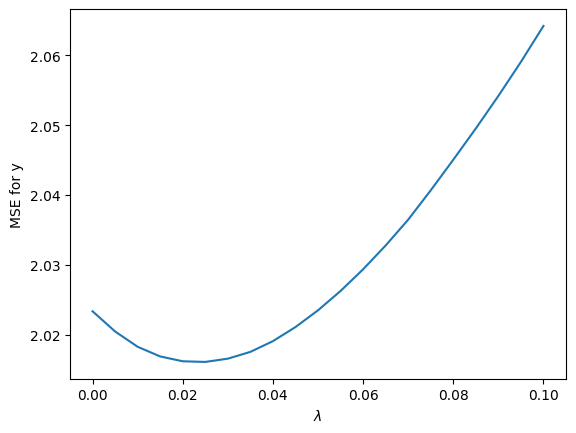

In [11]:
l1 = np.linspace(0,0.1,21)
best_lasso = choose_best_l1(X_aug, y_out, folds_indexes, l1)
print('the best penalty lambda is ',best_lasso)

#### Observe in 1.2.1:
I plot the $\lambda - MSE$ here, and find when $\lambda = 0.025$, it is an optimal value since here we have smallest MSE for y.

## 1.2.2

In [12]:
# here we can get a group of beta for each split 
def beta_group(X_train, y_train, num_folds,l1):
    
    # X_train: training inputs, shape(N, D)
    # y_train: training targets, shape(N, )
    # num_folds: how many folds we want to split
    # l1: regularization penalty lambda
    # return: beta lists with num_folds beta by lasso and OLS

    beta_list = []
    beta_ls_list = []
  
    folds = np.array_split(np.arange(len(y_train)), num_folds)
    for i in range(num_folds):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        
        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes] 
        
        beta_la = gradient_lasso(X_train_i, y_train_i, l1, num_iter = 2000)
        #y_predict = predict_with_estimate(X_val_i, beta_la)
        beta_ls = min_loss_estimate_aug(X_train_i, y_train_i)
        beta_list.append(beta_la)
        beta_ls_list.append(beta_ls)
        #m = np.sum((y_predict - y_val_i)**2)

    return beta_list, beta_ls_list 

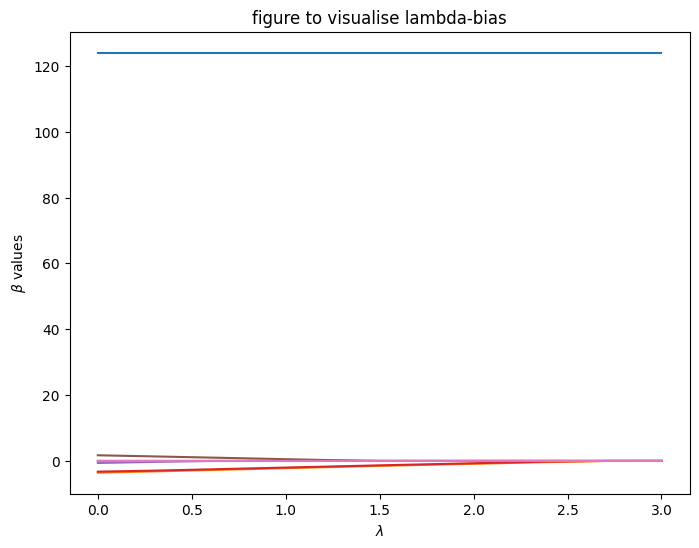

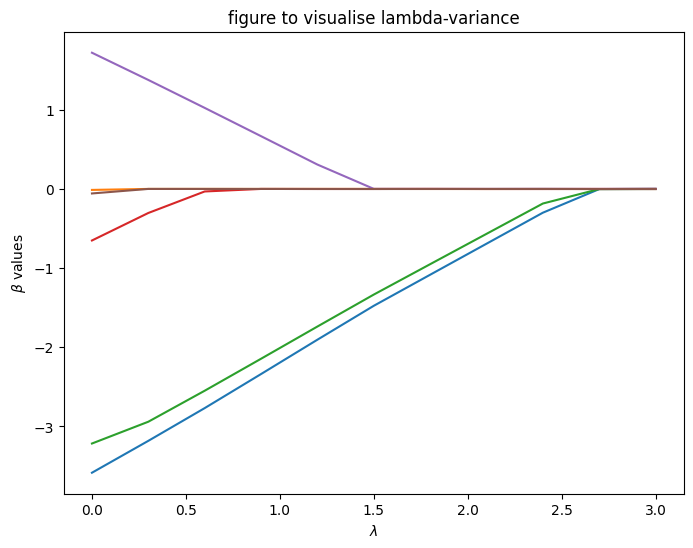

In [13]:
# Next I want to visualise the inferred parameters beta as a function of lasso penalty
beta_n = []
b0 = []

# we see beta change when lambda from 0 to 3
l1 = np.linspace(0,3,11)
for i in l1:
    beta_aug_lasso = gradient_lasso(X_aug, y_out, l1=i, num_iter = 2000)
    beta_n.append(beta_aug_lasso)
    b_0 = beta_group(X_aug, y_out, 5,i)[0][0][1:]
    
    b0.append(b_0)

# figure to show lambda-beta   
plt.figure(figsize=(8,6))
plt.plot(l1, beta_n)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$ values')
plt.title('figure to visualise lambda-bias')
plt.show()

# figure to show lambda-beta with out intercept
plt.figure(figsize=(8,6))
plt.plot(l1, b0)

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$ values')
plt.title('figure to visualise lambda-variance')
plt.show()

#### report of 1.2.2
Since we do not add penalty to $\beta_0$, so it do not change while changing $\lambda$.

As we increase the penalty term in lasso regression, the bias increases and the variance decreases.This is because the model becomes simpler and less flexible, reducing its ability to fit the noise in the training data, resulting in higher bias but lower variance. This is the property of lasso regression, since lasso is used to choose features by adding a penalty term to the sum of the absolute values of the $\beta$ except $\beta_0$. Some coefficients of not too obvious feature firstly trends to be zero while increasing $\lambda$. Penalty term forces some beta to become zero will result in a simpler model. 

Bias refers to the difference between the true beta and predicted beta. A very high bias model is one that is underfitting, meaning that it oversimplifies the relationship and has high error on both the training and test data. Here, if we trend many beta to zero, the model will be bad due to underfiting. Variance is how the predicted beta change with variations in the training data. A high variance model is one that is overfitting, meaning that it is too complex and captures the noise in the training data, leading to poor performance on the test data.

The optimal penalty term should be selected by a balance between these two factors, resulting in a model that has good performance on both the training and test data.


Then I plot $\lambda - Bias$ and $\lambda - Variance$ to show the trend I visualised above. I use the formula on notes:
$$bias:\quad ||E[\beta^*]-\beta|| $$
$$variance:\quad E[(\beta - \beta^*)(\beta - \beta^*)^T] $$
Here I choose OLS predicted $\beta$ as true value.

Text(0, 0.5, 'bias')

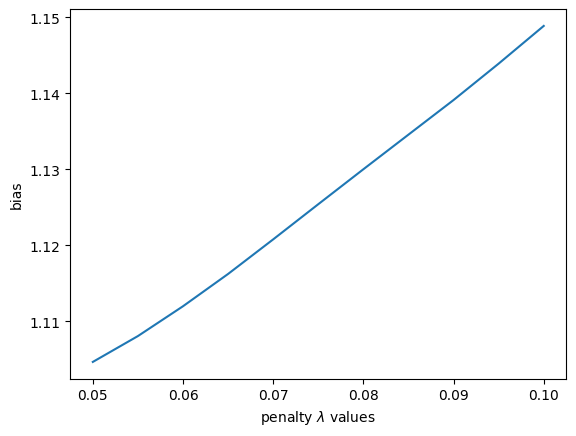

In [14]:
def bias(X, y, l1):
    beta_star = beta_group(X, y, 5,l1)[0]
    beta_0 = beta_group(X, y, 5,0)[1][0]
    bias = np.linalg.norm(np.mean(np.array(beta_star) ,axis = 0) - beta_0)
    return bias
# plot lambda-bias
l1 = np.linspace(0.05,0.1,11)
bias_2=[]
for i in l1:
    bias_2.append(bias(X_aug, y_out, i))
plt.plot(l1,bias_2)  
plt.xlabel(r"penalty $\lambda$ values")
plt.ylabel('bias')

Text(0, 0.5, 'variance')

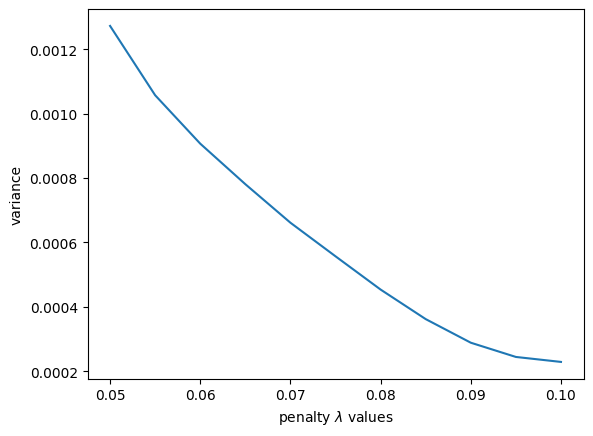

In [15]:
def var(X, y, l1):
    var_list = []
    beta_star = beta_group(X, y, 5,l1)[0]
    beta_mean = np.array(beta_star)
    beta_mean = np.mean(beta_mean, axis=0)
    for i in range(len(beta_star)):
        var_i = np.sum(beta_star[i] - beta_mean)**2
        var_list.append(var_i)
    sigma_square = np.mean(var_list)
    return sigma_square

vars=[]
for i in l1:
    vars.append((var(X_aug, y_out, i)))
    
plt.plot(l1,vars)  
plt.xlabel(r"penalty $\lambda$ values")
plt.ylabel('variance')

From this pictures, we show the increasing trend for bias and decreasing trend for the variance.

1.2.3

In [16]:
# standardise X 
# get the variables X and y
X_in = data_samples[:,:-1] # this is the other 6 columns as input x
y_out = data_samples[:,-1] # this is the Sound Pressure as output y

X_std, mu, sigma = standardise(X_in)
#y_std = standardise(y_out)
N, D = X_in.shape
X_aug = np.hstack([np.ones((N,1)), X_std]) # augmented training inputs of size N x (D+1)

data_original_test = pd.read_csv("airfoil_noise_test.csv")
data_test = data_original_test.to_numpy()
# Variables 
X_in_test = data_test[:,:-1] # this is the other 6 columns as input x
y_out_test = data_test[:,-1] # this is the sound pressure as output y
N, D = X_in_test.shape
X_std_test = (X_in_test - mu)/sigma
X_aug_test = np.hstack([np.ones((N,1)), X_std_test]) # augmented training inputs of size N x (D+1)


#estimate beta for in-sample data 
beta_lasso = gradient_lasso(X_aug, y_out, l1=0.025, num_iter = 2000) # fix lambda to the optimal value
beta_lasso0 = gradient_lasso(X_aug, y_out, l1=0, num_iter = 2000)
#predict y
y_predict_train = predict_with_estimate(X_aug, beta_lasso)
y_predict_train0 = predict_with_estimate(X_aug, beta_lasso0)
#performance of train: MSE and R2
mse_train = MSE(y_out, y_predict_train)
mse_train0 = MSE(y_out, y_predict_train0)
print(r'optimal penalty for train MSE', mse_train)
print(r'zero penalty for train MSE', mse_train0)
R2_train = r2_score(y_out, y_predict_train)
R2_train0 = r2_score(y_out, y_predict_train0)
print(r'optimal penalty for train R2 score',R2_train)
print(r'zero penalty for train R2 score',R2_train0)

#predict y
y_predict_test = predict_with_estimate(X_aug_test, beta_lasso)
y_predict_test0 = predict_with_estimate(X_aug_test, beta_lasso0)
#performance of test: MSE and R2
mse_test = MSE(y_out_test, y_predict_test)
mse_test0 = MSE(y_out_test, y_predict_test0)
print(r'optimal penalty for test MSE',mse_test)
print(r'zero penalty for test MSE',mse_test0)
R2_test = r2_score(y_out_test, y_predict_test)
R2_test0 = r2_score(y_out_test, y_predict_test0)
print(r'optimal penalty for test R2 score', R2_test)
print(r'zero penalty for test R2 score', R2_test0)


optimal penalty for train MSE 2.0064391211615114
zero penalty for train MSE 2.012913994256262
optimal penalty for train R2 score 0.9119936347219488
zero penalty for train R2 score 0.9117096340559452
optimal penalty for test MSE 2.1918432920389765
zero penalty for test MSE 2.213611185240563
optimal penalty for test R2 score 0.8987324708014255
zero penalty for test R2 score 0.8977267507445265


We can see the MSE and $R^2$ score for in-sample and out-of-sample data are similar, so our learning model is correct and properly fit. And the MSE for in-sample data is smaller than that for out-of-sample data, the $R^2$ score for in-sample data is higher than that for out-of-sample data. It is reasonable because we train the model from in-sample data.  

Then we compare the MSE and $R^2$ score for zero penalty and optimal penalty from 1.2.1. We can find the optimal $\lambda$ results are better(lower MSE and higher $R^2$ score for both in-sample and out-of-sample data).  Maybe our data is too simple and do not need too much regularization. We can also observe these by the figure we plot to find optimal $\lambda$.

#### 1.3 Elastic Nets (20 marks) 
1.3.1

The elastic net produces a convex combination of ridge and LASSO penalty terms, the loss function is:
$$L_{EN}(\beta) = \frac{1}{2N}||y - \beta X- \beta_0||^2 +\lambda[\alpha||\beta||_1 +(1-\alpha)||\beta||_2^2]$$
The subgradient of 1-norm is $sign(\beta)$ and the gradient of 2-norm is $2\beta$, so the direction d is 
$$\nabla L(\beta)=\frac{1}{N}[X^Ty - X^TX\beta] + \lambda \alpha sign(\beta) + \lambda (1-\alpha)2\beta$$
I also use the gradient descent method to get the optimisation. 

Here I also standardise the input data first.

In [17]:
def gradient_dec_net(X, y, l_net, a, max_iter = 2000):
  
    """ 
      Gradient descent for elastic net.
      Arguments:
          X: input data array, of shape (N, D).
          y: vector of training labels, of shape (N,).
          l_net: lambda(penalty)
          a: the parameter in loss function, alpha
          max_iter: stop criteria 
      Returns:
          predicted beta, of length D
    """
  
    N, D = X.shape
    beta = np.zeros(D)
    n = 1
    d = 0.5
    while np.linalg.norm(d) > 10**(-3): # this is the stop criterions, when iteration times is over 1e4 or error smaller than 1e-2, it stops

        lr = 1/n # the learning rate that is proportional to 1/Niter
        beta_d = np.sign(beta)
        beta_grad = 2*beta # add a 1e-10 to avoid the denominator to be zero
        beta_d[0] = 0
        beta_grad[0] = 0
        d = -X.T @ y / N + X.T @ X @ beta / N + l_net * (a * beta_d + (1-a)* beta_grad) # the descent direction
        beta = beta - lr * d # the update step for beta
        n += 1
        if n>max_iter:
            break
    
    return beta

In [18]:
N, D = X_std.shape
beta_net = gradient_dec_net(X_aug, y_out, l_net=0.001,a = 1,max_iter = 2000)
beta_lasso0 = gradient_lasso(X_aug, y_out, l1=0.001, num_iter = 2000)
print('Computed beta_net:', beta_net)
print('Computed beta_lasso:', beta_lasso0)

Computed beta_net: [ 1.23970283e+02 -3.58082395e+00  2.62703793e-02 -3.25694240e+00
 -6.14325916e-01  1.71573884e+00 -4.77176147e-02]
Computed beta_lasso: [ 1.23970283e+02 -3.58082395e+00  2.62703793e-02 -3.25694240e+00
 -6.14325916e-01  1.71573884e+00 -4.77176147e-02]


Above code show when $\alpha = 1$, the result is indeed the same with Lasso regression, this tells us our elastic net regression is correct.

1.3.2

In [19]:
# define the cross validation function
def cross_validation_net(X_train, y_train, folds, l_net, a):

    # X_train: training inputs, shape(N, D)
    # y_train: training targets, shape(N, )
    # folds: 5 folds with different index
    # l_net: regularization penalty lambda
    # return: mean MSE for each folds

    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        
        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]

        X_val_i = X_train[val_indexes, :] 
        y_val_i = y_train[val_indexes] 
        
        beta_l_net = gradient_dec_net(X_train_i, y_train_i, l_net, a, max_iter = 2000) # use train to predict beta
        y_predict = predict_with_estimate(X_val_i, beta_l_net) # use validation to get y

        MSE_net = MSE(y_val_i, y_predict)
        scores.append(MSE_net)

    # Return the average score
    return sum(scores) / len(scores) 

def choose_best_l_net(X_train, y_train, folds, l_net, a):

    # X_train: training inputs, shape(N, D)
    # y_train: training targets, shape(N, )
    # folds: 5 folds with different index
    # l_net: a list of regularization penalty lambda
    # return: best lambda with lowest MSE

    l_net_scores =[]
  
    for i in l_net:
        l_net_score = cross_validation_net(X_train, y_train, folds, i, a)
        l_net_scores.append(l_net_score)
        #print(f'CV_ACC@l={l_net}: {l_net_scores}')

    best_l_net_index = np.argmin(l_net_scores) # choose the one that has smallest MSE
    plt.figure()
    plt.plot(l_net,l_net_scores)
    return l_net[best_l_net_index]

alpha = 0.1, the best penalty lambda is  0.0
alpha = 0.5, the best penalty lambda is  0.0
alpha = 0.9, the best penalty lambda is  0.01


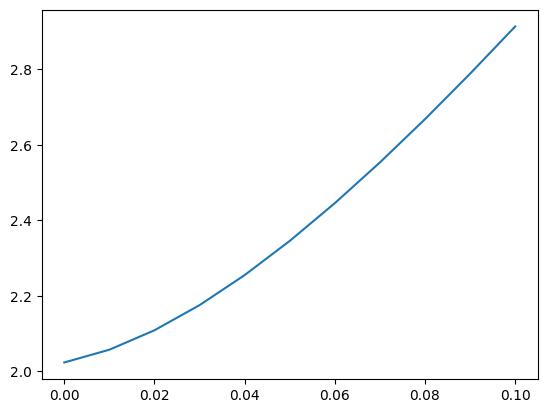

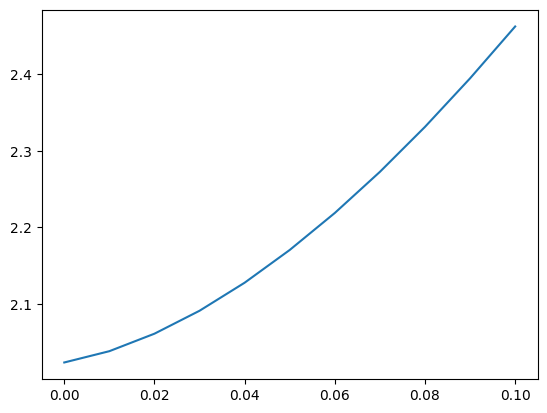

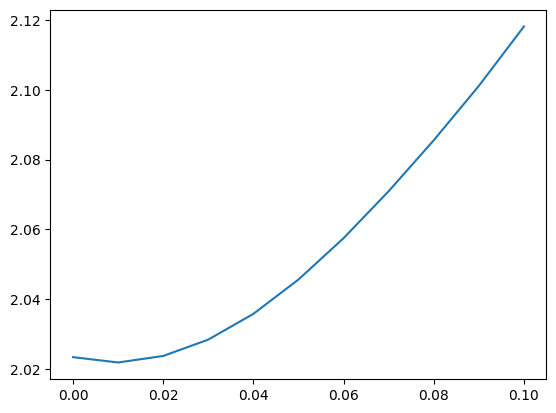

In [20]:
folds_indexes = cross_val_split(N, 5) # we split the data index to do cross validation.
#l_net1 = np.linspace(0,3,11)
# find the optimal penalty for a = 0
#best_net = choose_best_l_net(X_aug, y_out, folds_indexes, l_net1, a = 0)
#print(r'alpha = 0, the best penalty lambda is',best_net)
# find the optimal penalty for a = 0.1
l_net2 = np.linspace(0,0.1,11)
best_net = choose_best_l_net(X_aug, y_out, folds_indexes, l_net2, a = 0.1)
print(r'alpha = 0.1, the best penalty lambda is ',best_net)
# find the optimal penalty for a = 0.5
l_net3 = np.linspace(0,0.1,11)
best_net = choose_best_l_net(X_aug, y_out, folds_indexes, l_net3, a = 0.5)
print(r'alpha = 0.5, the best penalty lambda is ',best_net)

# find the optimal penalty for a = 0.9
l_net4 = np.linspace(0,0.1,11)
best_net = choose_best_l_net(X_aug, y_out, folds_indexes, l_net4, a = 0.9)
print(r'alpha = 0.9, the best penalty lambda is ',best_net)

# find the optimal penalty for a = 1
#l_net5 = np.linspace(0,0.1,11)
#best_net = choose_best_l_net(X_aug, y_out, folds_indexes, l_net5, a = 1)
#print(r'alpha = 1, the best penalty lambda is ',best_net)


I apply $0.1, 0.5, 0.9$ to the $\alpha$. After the cross validation, I can get the best penalty $\lambda$ for each $\alpha$.  

1. When $\alpha = 0.1$, ridge term has larger effect for the predictor, and the best $\lambda$ is $0$.  

2. When $\alpha = 0.5$, ridge and lasso term has equal effect for the predictor, and the best $\lambda$ is $0$.  

3. When $\alpha = 0.9$, lasso term has larger effect for the predictor, and the best $\lambda$ is $0.01$.  

The optimal value of lambda is found by balancing the trade-off between the fit of the model to the training data and the complexity of the model .

In [21]:
# Here I retrain the model with optimal lambda


#estimate beta for in-sample data
beta_aug_net_a1 = gradient_dec_net(X_aug, y_out, l_net=0, a = 0.1, max_iter = 2000)
beta_aug_net_a2 = gradient_dec_net(X_aug, y_out, l_net=0, a = 0.5, max_iter = 2000)
beta_aug_net_a3 = gradient_dec_net(X_aug, y_out, l_net=0.01, a = 0.9, max_iter = 2000)
#predict y in sample
y_predict_train_a1 = predict_with_estimate(X_aug, beta_aug_net_a1)
y_predict_train_a2 = predict_with_estimate(X_aug, beta_aug_net_a2)
y_predict_train_a3 = predict_with_estimate(X_aug, beta_aug_net_a3)
#performance of train: MSE and R2
mse_train_a1 = MSE(y_out, y_predict_train_a1)
mse_train_a2 = MSE(y_out, y_predict_train_a2)
mse_train_a3 = MSE(y_out, y_predict_train_a3)
print(r'a = 0.1 for in-sample data MSE', mse_train_a1)
print(r'a = 0.5 for in-sample data MSE', mse_train_a2)
print(r'a = 0.9 for in-sample data MSE', mse_train_a3)
R2_train_a1 = r2_score(y_out, y_predict_train_a1)
R2_train_a2 = r2_score(y_out, y_predict_train_a2)
R2_train_a3 = r2_score(y_out, y_predict_train_a3)
print(r'a = 0.1 for in-sample data R2 score',R2_train_a1)
print(r'a = 0.5 for in-sample data R2 score',R2_train_a2)
print(r'a = 0.9 for in-sample data R2 score',R2_train_a3)

#predict y use the in-sample predicted beta
y_predict_test_a1 = predict_with_estimate(X_aug_test, beta_aug_net_a1)
y_predict_test_a2 = predict_with_estimate(X_aug_test, beta_aug_net_a2)
y_predict_test_a3 = predict_with_estimate(X_aug_test, beta_aug_net_a3)
#performance of test: MSE and R2
mse_test_a1 = MSE(y_out_test, y_predict_test_a1)
mse_test_a2 = MSE(y_out_test, y_predict_test_a2)
mse_test_a3 = MSE(y_out_test, y_predict_test_a3)
print(r'a = 0.1 for out-of-sample data MSE', mse_test_a1)
print(r'a = 0.5 for out-of-sample data MSE', mse_test_a2)
print(r'a = 0.9 for out-of-sample data MSE', mse_test_a3)
R2_test_a1 = r2_score(y_out_test, y_predict_test_a1)
R2_test_a2 = r2_score(y_out_test, y_predict_test_a2)
R2_test_a3 = r2_score(y_out_test, y_predict_test_a3)
print(r'a = 0.1 for out-of-sample data R2 score',R2_test_a1)
print(r'a = 0.5 for out-of-sample data R2 score',R2_test_a2)
print(r'a = 0.9 for out-of-sample data R2 score',R2_test_a3)

a = 0.1 for in-sample data MSE 2.012913994256262
a = 0.5 for in-sample data MSE 2.012913994256262
a = 0.9 for in-sample data MSE 2.011881116515579
a = 0.1 for in-sample data R2 score 0.9117096340559452
a = 0.5 for in-sample data R2 score 0.9117096340559452
a = 0.9 for in-sample data R2 score 0.9117549381046828
a = 0.1 for out-of-sample data MSE 2.213611185240563
a = 0.5 for out-of-sample data MSE 2.213611185240563
a = 0.9 for out-of-sample data MSE 2.2074928231729714
a = 0.1 for out-of-sample data R2 score 0.8977267507445265
a = 0.5 for out-of-sample data R2 score 0.8977267507445265
a = 0.9 for out-of-sample data R2 score 0.8980094312680738


1. Comparing in-sample and out-of-sample MSE and $R^2$:  
The MSE and $R^2$ score for in-sample and out-of-sample are similar to each other, so our learning model is correct and proper fit. The MSE for in-sample data is smaller than that for out-of-sample data and $R^2$ score for in-sample data is slightly larger than that for out-of-sample data. These are because we train the model from in-sample data.  

2. Comparing each $\alpha$: 

When $\alpha = 0.1$, ridge regularization has larger influence, the best $\lambda$ is $0$, this is because the data is simple and has sufficient information to estimate the coefficients accurately, without the need for regularization to reduce overfitting.


When $\alpha = 0.5$, the regularization is equally balanced between L1 and L2 regularization, meaning that both the L1 and L2 regularization terms have the same weight in the optimization objective. In this case, the optimal value of lambda for the elastic net regularization can be zero when the model does not require any regularization, as we discussed before.

When $\alpha = 0.9$, L1 regularization has larger influence, and more like lasso regression, which can shrink small coefficients. We have a small optimal $\lambda$ to encourage sparsity in the coefficients. And we can see, $\alpha = 0.9$ has better performance due to lower MSE for in-sample data and out-of-sample data. 

1.3.3

From 1.3.2,  
$\alpha = 0$, it is the ridge regression, $\lambda = 0$ will lead to the smallest MSE.  
$\alpha = 0.5$, the lasso and ridge term have the same importance, $\lambda = 0.$ will lead to the smallest MSE.  
$\alpha = 1$, it is the lasso regression, $\lambda = 0.025$ will lead to the smallest MSE, which is the same as question1.2. 

[ 1.23970283e+02 -3.58232181e+00  2.44138807e-02 -3.25641182e+00
 -6.16611239e-01  1.71691826e+00 -4.83294833e-02] [ 1.23970283e+02 -3.58232181e+00  2.44138807e-02 -3.25641182e+00
 -6.16611239e-01  1.71691826e+00 -4.83294833e-02] [ 1.23970283e+02 -3.54659742e+00  4.74888175e-02 -3.26181254e+00
 -5.66628795e-01  1.68800215e+00 -2.62664047e-02]


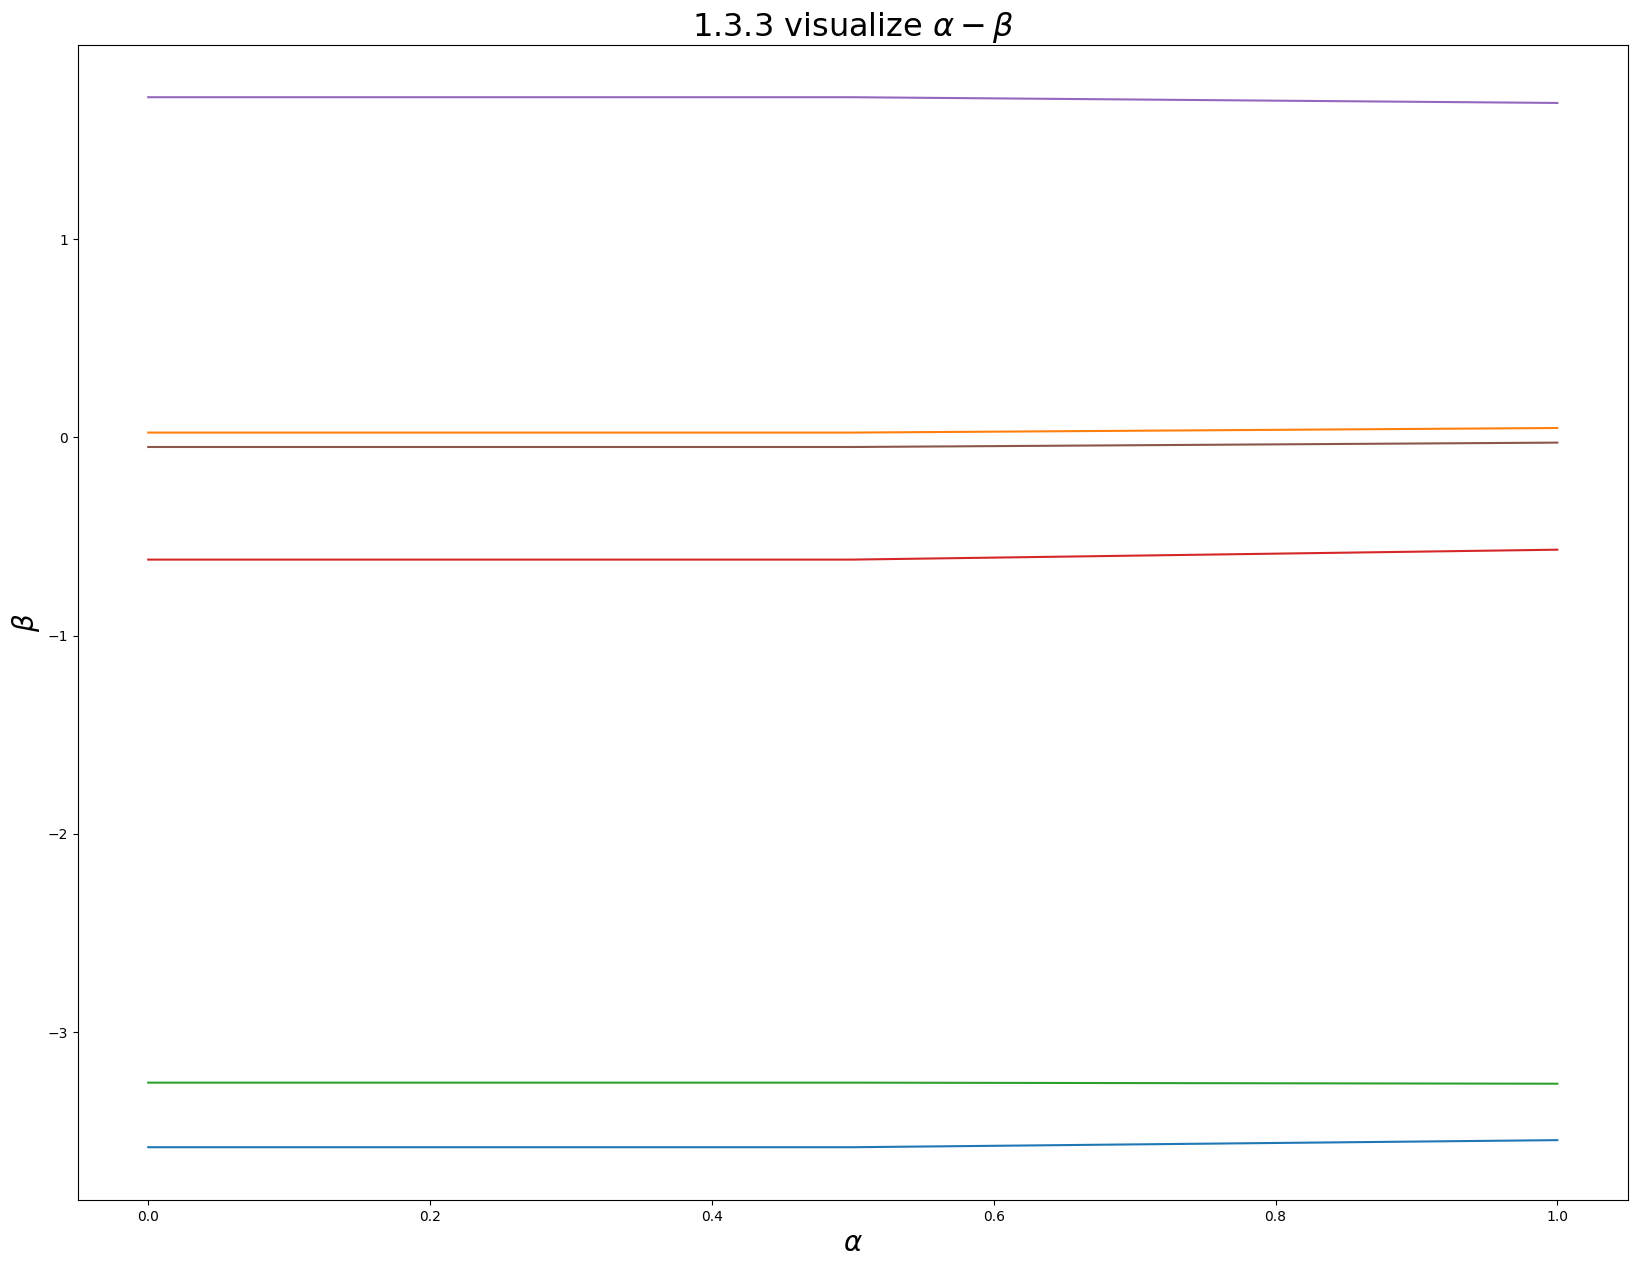

In [22]:
#estimate beta for train
beta_aug_net_a1 = gradient_dec_net(X_aug, y_out, l_net=0, a = 0, max_iter = 2000)
beta_aug_net_a2 = gradient_dec_net(X_aug, y_out, l_net=0, a = 0.5, max_iter = 2000)
beta_aug_net_a3 = gradient_dec_net(X_aug, y_out, l_net=0.025, a = 1, max_iter = 2000)

beta = [beta_aug_net_a1[1:], beta_aug_net_a2[1:], beta_aug_net_a3[1:]]
a = [0, 0.5, 1]
plt.figure(figsize=(20,15))
plt.plot(a, beta)
plt.xlabel(r'$\alpha$', size = 20)
plt.ylabel(r'$\beta$', size = 20)
plt.title(r'1.3.3 visualize $\alpha - \beta$', size = 23)
print(beta_aug_net_a1, beta_aug_net_a2, beta_aug_net_a3)

From the picture, we find $\alpha$ do not affect $\beta$ a lot. As we discuss before, regularization has no need to add for our data.

When $\alpha = 0$, it is ridge regularization, which can shrink big coefficients, the best $\lambda$ is $0$, this is because the data has no need for regularization to reduce overfitting. Or maybe beta not too large. The data here is not highly complex and overfitting is not a major concern,  indicating that no regularization is necessary to obtain a good fit to the data.


When $\alpha = 0.5$, the regularization is equally balanced between L1 and L2 regularization, meaning that both the L1 and L2 regularization terms have the same weight in the optimization objective. In this case, the optimal value of lambda for the elastic net regularization can be zero when the model does not require any regularization, as we discussed before.

Since $\lambda$ are zeros, so $\alpha = 0$ and $\alpha = 0.5$ will have same predict.

When $\alpha = 1$, it is lasso regression. We have a small optimal $\lambda$, beta is shrinked to zero a bit and has slightly small variance from the figure.

In summary, lasso uses an L1 penalty, which tends to shrink some small beta to exactly zero. If lambda is set to zero, there is no penalty, and all betas are estimated without any constraint, which may result in overfitting. Ridge uses an L2 penalty, which shrinks large betas, but does not lead to exact zeros. 


#### 1.4 kNN regression (10 marks)
1.4.1


Implement in the following cell the Euclidean distance $d$, defined as
$$
d(\boldsymbol p, \boldsymbol q) = \sqrt{\sum_{i=1}^D{(q_i-p_i)^2}} \, ,
$$
where $\boldsymbol p$ and $\boldsymbol q$ are the two points in our $D$-dimensional Euclidean space.  
The step is:  

1. Compute all distances between input x and the samples:
$$||x^{in} - x^i||$$
2. Find the k nearest neighbours to input x.  
3. The simplest choice for predictor is just averaging over the values of the output samples in the neighbourhood.  

In regression here, I also use MSE as a score to get the optimal k by minimising it.

We try to find the _k_ nearest neighbours in our train set for every test data point. We calculate the label of every point in the test set as the mean of the _k_ nearest neighbours.

In [23]:
def euclidian_distance(p, q):
    
    # p,q: coordinates 
    # return: distance of two coordinates

    return np.sqrt(np.sum((p-q)**2, axis=1)) ## the distance

def k_neighbours(X_train, X_test, k=5, return_distance=False):

    # X_train: training inputs
    # X_test: testing inputs
    # k: how many neighbours we choose
    # return: an array of closest indexes

    n_neighbours = k
    dist = []
    neigh_ind = []
    
    # compute distance from each point x_test in X_test to all points in X_train (hint: use python's list comprehension)
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test] ## <-- SOLUTION

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)
    
    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
    
    return np.array(neigh_ind)

We need to define a predicting function which we call `reg_predict`. 

In [24]:
def reg_predict(X_train, X_test, y_train, k):
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k)
    # compute mean over neighbours labels (hint: use python's list comprehension)
    y_pred = np.array([np.mean(y_train[neighbour]) for neighbour in neighbours])

    return y_pred

def cross_validation_knn(X_train, y_train, folds, k):

    # X_train: training inputs, shape(N, D)
    # y_train: training targets, shape(N, )
    # folds: 5 folds with different index
    # k: how many neighbours we choose
    # return: mean MSE for each folds

    scores_knn = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
    
        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]
        
        X_val_i = X_train[val_indexes, :] 
        y_val_i = y_train[val_indexes] 
        
        y_predict = reg_predict(X_train_i, X_val_i, y_train_i, k) ## predict calculated by new train and validation
        
        MSE_knn = MSE(y_val_i, y_predict) # here use MSE to justify the performance of my model
        scores_knn.append(MSE_knn)
        
         # Return the average score
    return sum(scores_knn) / len(scores_knn) # get the mean MSE

def choose_best_k(X_train, y_train, folds, k_range):

    # X_train: training inputs, shape(N, D)
    # y_train: training targets, shape(N, )
    # folds: 5 folds with different index
    # k: a list with different k values
    # return: best k for lowest MSE

    k_scores = np.zeros((len(k_range),))
  
    for i, k in enumerate(k_range):
        k_scores[i] = cross_validation_knn(X_train, y_train, folds, k)
        print(f'CV_ACC@k={k}: {k_scores[i]:.3f}')

    best_k_index = np.argmin(k_scores) # smallest MSE leads to best k
    return k_range[best_k_index]

In [25]:
best_k = choose_best_k(X_std, y_out, folds_indexes, np.arange(1, 21))
print('best_k for regression:', best_k)

CV_ACC@k=1: 5.287
CV_ACC@k=2: 3.865
CV_ACC@k=3: 3.423
CV_ACC@k=4: 3.221
CV_ACC@k=5: 3.109
CV_ACC@k=6: 3.051
CV_ACC@k=7: 3.013
CV_ACC@k=8: 3.008
CV_ACC@k=9: 2.999
CV_ACC@k=10: 2.997
CV_ACC@k=11: 3.002
CV_ACC@k=12: 3.003
CV_ACC@k=13: 3.004
CV_ACC@k=14: 3.020
CV_ACC@k=15: 3.045
CV_ACC@k=16: 3.050
CV_ACC@k=17: 3.077
CV_ACC@k=18: 3.096
CV_ACC@k=19: 3.099
CV_ACC@k=20: 3.121
best_k for regression: 10


Here, optimal k is 10 since the MSE are the smallest.

1.4.2

In [26]:
y_pred_t = reg_predict(X_std, X_std_test, y_out, 10)
#performance of test: MSE and R2
mse_test_knn = MSE(y_pred_t, y_out_test)
print(r'k=10 for test MSE', mse_test_knn)

k=10 for test MSE 2.9856747429274453


Here we can see the MSE for out-of-sample data is larger, not slightly as before, so we can induce that the KNN regression model is a little underfit. Compared to the learning model in 1.1, 1.2, 1.3, the KNN regression has larger MSE for in-sample data and out-of-sample data and more easily to get underfit. The MSE for in-sample data is larger than other model. So for our data, KNN is not suitable to use when regression. 

So the outcome variable should be predicted as a linear combination of the predictor variables for OLS, lasso and elastic net, we need first predict '$\beta$', and multiply it by to input X for refression. But for KNN, it is a non-parametric regression technique that is used to predict the outcome variable based on the values of its k nearest neighbors in the predictor variable space. KNN can be useful when the relationship between the predictors and the outcome variable is non-linear or when there are no clear patterns in the data. But it is not suitable for our data.

So our data is more suitable use linear regression and the relationship is linear in some way.

## Task 2: Classification  (50 marks)



#### 2.1 Random forest (20 marks)
2.1.1

I will use decision trees as a classification algorithm with the cross entropy. 
The formula for cross entropy is:
$$CE[\pi(R_{\alpha})] = \sum_{q=1}^Q\pi_q(R_{\alpha})log\pi_q(R_{\alpha}) $$
which corresponds to the entropy of the distribution $\pi(R_{\alpha})$.

- Decision tree algorithm is a _greedy algorithm_ that splits the data samples $\boldsymbol y$ into _left_ $\boldsymbol y_l$ and _right_ $\boldsymbol y_r$ samples, and the splitting is applied recursively on each side, resulting in a binary-tree like of splittings.  

- To determine $j$ and $s$ at each split node, we may use _cross entropy_ to search for $j$ and $s$ that minimizes the weighted sum of _cross entropy_ of the left side samples and right side samples:
$$CE(\boldsymbol y; j, s) = p_l \times CE(\boldsymbol y_l) + p_r \times CE(\boldsymbol y_r)$$
where $p_l$ and $p_r$ are, respectively, the cumulative weights of samples on the left and on the right, while $CE(\boldsymbol y)$ is defined as:
$$CE(\boldsymbol y) = = -\sum_{i=1}^Q \mathbb P (y = c_i)log(\mathbb P (y = c_i))$$
where $c_i$ is the i-th class out of $Q$ distinct classes, so $\mathbb P (y = c_i)$ reads the weight of the class $i$ in the current sample $\boldsymbol y$.

In [27]:
def cross_entropy(y, sample_weights):
    """ 
    Calculate the cross_entropy for labels.
    Arguments:
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (float): the cross_entropy for y.
    """

    # count different labels in y，and store in label_weights
    # initialize with zero for each distinct label.
    label_weights = {yi: 0 for yi in set(y)}  
    for yi, wi in zip(y, sample_weights):
        label_weights[yi] += wi
        
    total_weight = sum(label_weights.values())
    ce = 0 
    for label, weight in label_weights.items():
        ce -=  (weight/total_weight) * np.log(weight/total_weight) # pi = weight/total_weight
    
    return ce

def split_samples(X, y, sample_weights, column, value, categorical):
    """
    Return the split of data whose column-th feature:
        1. equals value, in case `column` is categorical, or
        2. less than value, in case `column` is not categorical (i.e. numerical)

    Arguments:
        X: training features, of shape (N, D).
        y: vector of training labels, of shape (N,), No diabetes or diabetes
        sample_weights: weights for each samples, of shape (N,).r splitting.
        value: splitting threshold  the sam
        column: the column of the feature foples 
        categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
        tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
        tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
        tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
    """ 
    if categorical:
        left_mask =(X[:, column] == value)
    else:
        left_mask = (X[:, column] < value)
    
    X_left, X_right = X[left_mask, :], X[~left_mask, :]
    y_left, y_right = y[left_mask], y[~left_mask]
    w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]
    
    return (X_left, X_right), (y_left, y_right), (w_left, w_right)

#It's now time to choose the best feature to split by calling the function cross_entropy_split_value for each feature.
def cross_entropy_split_value(X, y, sample_weights, column, categorical):
    
    # X: N x D matrix of training features
    # y: N x 1 vector of training labels
    # sample weights: the weight we add on y
    # column: the column of the feature for calculating. 
    # returns: the resulting cross-entropy and the corresponding value used in splitting.
    # categorical: boolean value indicating whether column is a categorical variable or numerical.


    unique_vals = np.unique(X[:, column])
    
    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."
    
    cross_entropy_val, threshold = np.inf, None
    # split the values of i-th feature and calculate the cost 
    for value in unique_vals:
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical) 
        # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue
        
        p_left = sum(w_l)/(sum(w_l) + sum(w_r))
        p_right = 1 - p_left
        new_cost = p_left * cross_entropy(y_l, w_l) + p_right * cross_entropy(y_r, w_r)

        if new_cost < cross_entropy_val:
            cross_entropy_val, threshold = new_cost, value
    
    return cross_entropy_val, threshold


def cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict):
    """
    Choose the best feature to split according to criterion.
    Args:
        n_features: number of sampled features.
        X: training features, of shape (N, D).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
        (float, int, float): the minimized cross_entropy, the best feature index and value used in splitting.
    """

    columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
    columns_dict = {c: columns_dict[c] for c in columns}
    
    min_ce_index, split_column, split_val = np.inf, 0, 0
    for column, categorical in columns_dict.items():
        if len(np.unique(X[:, column])) < 2:
            continue
        
        ce_index, val = cross_entropy_split_value(X, y, sample_weights, column, categorical)
        
        if ce_index < min_ce_index:
            min_ce_index, split_column, split_val = ce_index, column, val
            
    return min_ce_index, split_column, split_val

# Now, we need a function that returns the label which appears the most in our label variable y.

def majority_vote(y, sample_weights):
    """
    Return the label which appears the most in y.
    Args:
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (int): the majority label
    """
    majority_label = {yi: 0 for yi in set(y)}

    for yi, wi in zip(y, sample_weights):
      majority_label[yi] += wi
    return max(majority_label, key=majority_label.get)


def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth, max_depth=10,  min_samples_leaf=2): 
    """Build the decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, D).
        y: (np.array) vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
            1. 'feature_name': The column name of the split.
            2. 'feature_index': The column index of the split.
            3. 'value': The value used for the split.
            4. 'categorical': indicator for categorical/numerical variables.
            5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
            6. 'left': The left sub-tree with the same structure.
            7. 'right' The right sub-tree with the same structure.
        Example:
            mytree = {
                'feature_name': 'petal length (cm)',
                'feature_index': 2,
                'value': 3.0,
                'categorical': False,
                'majority_label': None,
                'left': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'majority_label': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
                'right': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'majority_label': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
            }
    """
    # include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
    if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf: 
        return {'majority_label': majority_vote(y, sample_weights)}
    
    else:
        CE, split_index, split_val = cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict)
        
        # If CE is infinity, it means that samples are not seperable by the sampled features.
        if CE == np.inf:
            return {'majority_label': majority_vote(y, sample_weights)}
        
        categorical = columns_dict[split_index]
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical)
        return {
            'feature_name': feature_names[split_index],
            'feature_index': split_index,
            'value': split_val,
            'categorical': categorical,
            'majority_label': None,
            'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
            'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
        }

# Now it is time to write the training function the constructs multiple decision trees, each operating on a subset of samples (with replacement).
def train_rf(B, n_features, X, y,  columns_dict, max_depth, sample_weights=None):
    """
    Build the decision tree according to the training data.
    Args:
        B: number of decision trees.
        X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        sample_weights: weights for each samples, of shape (N,).
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    for _ in range(B):
        sample = np.random.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        w_sample = sample_weights[sample]
        tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth=1, max_depth = max_depth)
        trees.append(tree)

    return trees

def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Args:
        x: ((pd.Dataframe) a single sample features, of shape (D,).
    Returns:
        (int): predicted testing sample label.
    """
    if tree['majority_label'] is not None: 
      return tree['majority_label']

    elif tree['categorical']:
        if x[tree['feature_index']] == tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

    else:
        if x[tree['feature_index']] < tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)


def predict_rf(rf, X):
    """
    Predict classification results for X.
    Args:
        rf: A trained random forest through train_rf function.
        X: (pd.Dataframe) testing sample features, of shape (N, D).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """

    def aggregate(decisions):
      count = defaultdict(int)
      for decision in decisions:
        count[decision] += 1
      return max(count, key=count.get)

    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

In [28]:
# Just like the MSE before, we need a 'score' to see the model performance and do grid search later
def rf_score(rf, X_test, y_test):

    # rf: A trained random forest through train_rf function.
    # X_test: matrix of test features, shape(N, D)
    # y_test: vector of test labels, shape(N,)
    # returns: accuracy for predicted labels 

    y_pred = predict_rf(rf, X_test)
    return np.mean(y_pred==y_test)

def cross_val_split(N, num_folds):
    fold_size = N // num_folds
    index_perm = np.random.permutation(np.arange(N))
    folds = []
    for k in range(num_folds):
        folds.append(index_perm[k*fold_size:(k+1)*fold_size])
    return folds
#the cross validation for random forest
def cross_validation_rfscore(X_train, y_train, folds, n_features, B, max_depth,sample_weights):
    score = np.zeros(folds)
    n = np.shape(X_train.to_numpy())[0]
    index_n = cross_val_split(n, folds)

    for i in range(folds):
        val_indexes = index_n[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train.iloc[train_indexes]
        y_train_i = y_train.iloc[train_indexes]

        X_val_i = X_train.iloc[train_indexes]
        y_val_i = y_train.iloc[train_indexes]

        columns_dict = {index: False for index in range(X_train_i.shape[1])}

        rf = train_rf(B, n_features, X_train_i, y_train_i, columns_dict, max_depth,sample_weights=sample_weights) # random forest we trained
        score[i] = rf_score(rf, X_val_i.to_numpy(), y_val_i.to_numpy())
    
    return np.mean(score)

def choose_best(X, y, max_depth, B_list,n_features, sample_weights):
    '''
    Grid search: want to find the best B and max_depth 
    Args:
        X:(pd.Dataframe) testing sample features, of shape (N, D).
        y:(pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        max_depth: the depth list we use to compare
        B_list: the number of decision trees list we use to compare
        sample_weight: the weight we introduce
        n_features: number of features we choose, classification always use sqrt(p)
    '''
    score = np.zeros((len(max_depth), len(B_list)))

    for i in range(len(max_depth)):
        for j in range(len(B_list)):
            folds = 4 # due to 4-fold cross validation
            score[i, j] = cross_validation_rfscore(X, y, folds, n_features, B_list[j], max_depth[i], sample_weights)
    
    id = np.where(score == np.max(score)) # largest rf score means best performance
    row = id[0][0]
    col = id[1][0]
    return score[row, col], max_depth[row], B_list[col]


In [29]:
# load the data at first, we change ',' to '.'
data_samples = pd.read_csv("diabetes_samples.csv", decimal=",")
data_test = pd.read_csv("diabetes_test.csv", decimal=",")
X_rf = data_samples[data_samples.columns[1:-1]]
y_rf = data_samples[data_samples.columns[-1]]

X_rf_test = data_test[data_test.columns[1:-1]]
y_rf_test = data_test[data_test.columns[-1]]

sample_weights = None # for 2.1.1, we do not consider sample_weights and set it to None

# We need a dictionary indicating whether the column index maps to a 
# categorical feature or numerical
# In this example, all features are numerical (categorical=False)
columns_dict = {index: False for index in range(X_rf.shape[1])}


In [30]:
n_features =4 # since here is classification, we choose p**0.5 
# we set the max_depth, B_list to compare and choose the best number of decision trees: opti_B and best max_depth: max_d

max_depth = [i*1 for i in range(5, 10)]
B_list =  [i*5 for i in range(1,6)]

# find best max_depth and B
score, max_d_no_weight, B_no_weight = choose_best(X_rf, y_rf, max_depth, B_list,n_features, sample_weights=None)
print(score, max_d_no_weight, B_no_weight)

0.9951219512195122 9 15


Here we get our best number of decision trees: opti_B and best max_depth: max_d, the accuracy is as above.

2.1.2

I first define a function called _confu_matrix_, and return accuracy, recall, F1_score to see the performance of the model and compare conviniently.

In [31]:
def confu_matrix(y_optimal_pred, y_test):
    
    # y_optimal_pred: predicted y with optimal B and maxdepth
    # y_test: true targets in data

    TP, FP, FN, TN = 0,0,0,0
    num = len(y_optimal_pred)
    for i in range(num):
        if y_optimal_pred[i] == y_test[i]:
            if y_optimal_pred[i] == 'Diabetes': # here, I set 'Diabetes' to be positive
                TP +=1
            else:
                TN +=1
        else:
            if y_optimal_pred[i] == 'Diabetes':
                FP += 1
            else:
                FN += 1
    # by formula                   
    recall = TP / (TP + FN+1e-20) #plus a very small number to prevent zero error           
    accuracy = (TP + TN) / num
    precision = TP / (TP + FP+1e-20)
    
    F1_score = 2 * precision * recall / (precision + recall+1e-20)
    
    return accuracy, precision, F1_score

Re-train my optimal random forest classifier. 

In [32]:
columns_dict_test = {index: False for index in range(X_rf_test.shape[1])}
# first I predict the random forest trees by in-sample data
best_rf = train_rf(B_no_weight, n_features, X_rf, y_rf, columns_dict, max_d_no_weight, sample_weights=None)

# and then use it to get in-sample y_predict and out-of-sample y_predict_test
y_predict = predict_rf(best_rf, X_rf.to_numpy())
y_predict_test = predict_rf(best_rf, X_rf_test.to_numpy())

performance_train = confu_matrix(y_predict, y_rf.to_numpy())
performance_test = confu_matrix(y_predict_test, y_rf_test.to_numpy())
print('for train data, the performance by accuracy, precision, F1-score is:', performance_train )
print('for test data, the performance by accuracy, precision, F1-score is:', performance_test )

for train data, the performance by accuracy, precision, F1-score is: (0.9853479853479854, 1.0, 0.9523809523809523)
for test data, the performance by accuracy, precision, F1-score is: (0.9230769230769231, 0.8181818181818182, 0.6666666666666666)


Here, our data is very unbalanced, random forests can perform not too good on unbalanced data because the algorithm is biased towards the majority class. The model will be trained to minimize the overall error rate. In our data, over 80% are 'No diabetes', when we use random forest to predict y, to achieve a high overall accuracy, all predicts can be 'No diabetes'. So accuracy is not too useful to see the performance.

From the comparison of train and test data, we can see out model is overfit. We have high accuracy, precision and F-score for training data and lower accuracy, precision and F-score for test data.







2.1.3

In [33]:
# calculate the sample weight here
temp_y = y_rf.to_numpy()
no_diabetes = y_rf.value_counts()[0]
diabetes = y_rf.value_counts()[1]
sample_weights0 = np.zeros(len(temp_y))
for i in range(len(temp_y)):
    if temp_y[i] == 'No diabetes':
        sample_weights0[i] = (diabetes + no_diabetes) / (2*no_diabetes)
    if temp_y[i] == 'Diabetes':
        sample_weights0[i] = (diabetes + no_diabetes) / (2*diabetes)

In [34]:
# load the data at first, we change ',' to '.'
data_samples = pd.read_csv("diabetes_samples.csv", decimal=",")
data_test = pd.read_csv("diabetes_test.csv", decimal=",")

n_features =4 # since here is classification, we choose p**0.5
X_rf = data_samples[data_samples.columns[1:-1]]
y_rf = data_samples[data_samples.columns[-1]]

X_rf_test = data_test[data_test.columns[1:-1]]
y_rf_test = data_test[data_test.columns[-1]]
max_depth = [i*1 for i in range(5, 10)]
B_list =  [i*10 for i in range(1,6)]

score, max_d_weighted, B_weighted  = choose_best(X_rf, y_rf, max_depth, B_list, n_features, sample_weights0)
print(score, max_d_weighted, B_weighted )

0.9975609756097561 8 50


The best max_depth and B are above, since it is 'random' forest, we may have different result every time.

In [35]:
B_weighted = 30
max_d_weighted = 9
data_samples = pd.read_csv("diabetes_samples.csv", decimal=",")
data_test = pd.read_csv("diabetes_test.csv", decimal=",")
X = data_samples[data_samples.columns[1:-1]]
y = data_samples[data_samples.columns[-1]]
X_test = data_test[data_test.columns[1:-1]]
y_test = data_test[data_test.columns[-1]]

sample_weights = np.zeros(len(temp_y))
for i in range(len(temp_y)):
    if temp_y[i] == 'No diabetes':
        sample_weights[i] = (diabetes + no_diabetes) / (2*no_diabetes)
    if temp_y[i] == 'Diabetes':
        sample_weights[i] = (diabetes + no_diabetes) / (2*diabetes)

rf_without_wei = train_rf(B_no_weight, 4, X, y, columns_dict, max_d_no_weight, sample_weights=None)
rf_wei = train_rf(B_weighted, 4, X, y, columns_dict, max_d_weighted, sample_weights=sample_weights)

y_predict2 = predict_rf(rf_wei, X.to_numpy())
y_predict2_test = predict_rf(rf_wei, X_test.to_numpy())
performance_train2 = confu_matrix(y_predict2, y.to_numpy())
performance_test2 = confu_matrix(y_predict2_test, y_test.to_numpy())
print('for train data with weight, the performance by accuracy, precision, F1-score is:', performance_train2)
print('for test data with weight, the performance by accuracy, precision, F1-score is:', performance_test2)

print('for train data with no weight, the performance by accuracy, precision, F1-score is:', performance_train)
print('for test data with no weight, the performance by accuracy, precision, F1-score is:', performance_test)


for train data with weight, the performance by accuracy, precision, F1-score is: (1.0, 1.0, 1.0)
for test data with weight, the performance by accuracy, precision, F1-score is: (0.9316239316239316, 0.8333333333333334, 0.7142857142857143)
for train data with no weight, the performance by accuracy, precision, F1-score is: (0.9853479853479854, 1.0, 0.9523809523809523)
for test data with no weight, the performance by accuracy, precision, F1-score is: (0.9230769230769231, 0.8181818181818182, 0.6666666666666666)


From the accuracy, recall, F1-score, we can obviously observe if we introduce the weight to data, the classifier works better although also overfit. But model after weight has larger

In [36]:
# I add threshold while predicting y
def Roc_rf(rf, X, threshold, B):
    """
    Predict classification results for X.
    Args:
        rf: A trained random forest through train_rf function.
        X: (pd.Dataframe) testing sample features, of shape (N, D).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """
    def aggregate(decisions):
      count = defaultdict(int)
      for decision in decisions:
        count[decision] += 1

      if count['Diabetes'] >= threshold * B:
          y = 'Diabetes'
          return y
      else:
          y2 = 'No diabetes'
          return y2

    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

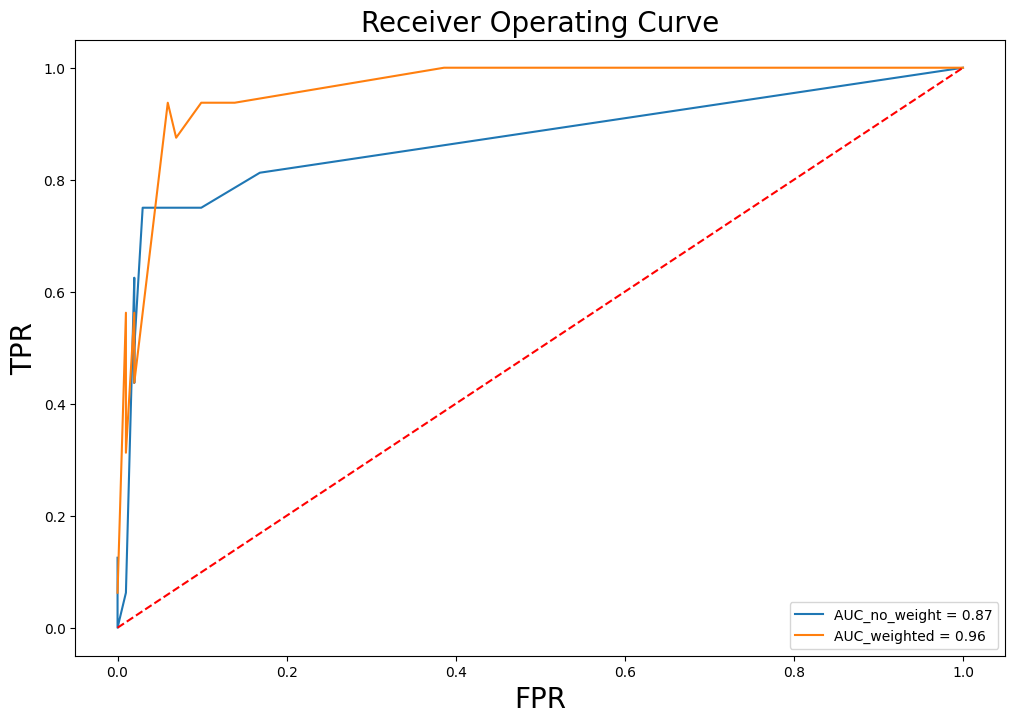

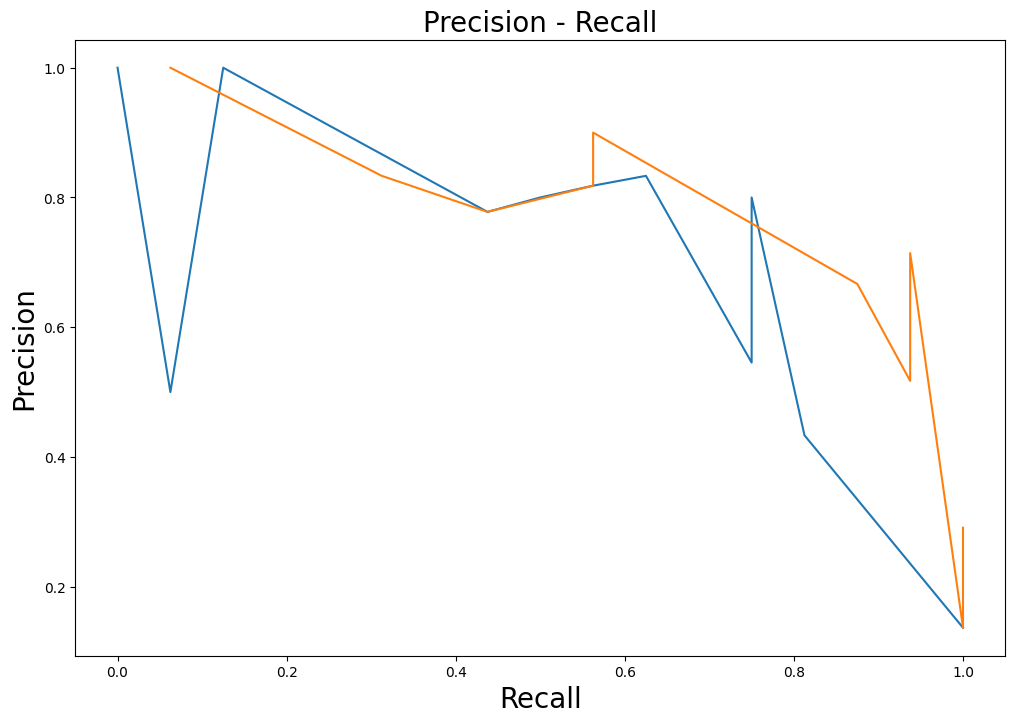

In [38]:
# here I prepare my data to plot ROC curve
def cal_ROC(rf, X_test, y_test, B, threshold):
    y_predict = Roc_rf(rf, X_test, B, threshold)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_predict)):
        if y_predict[i] == y_test[i]:
            if y_predict[i] ==  'Diabetes':
                TP += 1
            else:
                TN += 1
        else:
            if y_predict[i] ==  'Diabetes':
                FP += 1
            else:
                FN += 1
    # more robust way to get TPR, FPR, recall, precision
    if TP+FN == 0:
        TPR = 0
    else:
        TPR = TP / (TP+FN)
    if TN+FP == 0:
        FPR = 1
    else:
        FPR = 1 - TN/(TN+FP)
    if TP+FP == 0:
        precision = 1
    else:
        precision = TP/(TP+FP)
    recall = TPR
    return TPR, FPR, recall, precision
    

def plot_ROC(X, y, X_test, y_test, max_d, B, sample_weights, threshold_list):
    TPR_list = []
    FPR_list = []
    recall_list = []
    precision_list = []
    for t in threshold_list:
        columns_dict = {index: False for index in range(X.shape[1])}
        rf = train_rf(B, n_features, X, y, columns_dict, max_d_no_weight,sample_weights=sample_weights)
        TPR, FPR, recall, precision = cal_ROC(rf, X_test.to_numpy(), y_test.to_numpy(), B, t)
        TPR_list.append(TPR)
        FPR_list.append(FPR)
        recall_list.append(recall)
        precision_list.append(precision)
    return np.array(TPR_list), np.array(FPR_list), np.array(recall_list), np.array(precision_list)

threshold_list = np.linspace(0, 1, 11)

max_d_no_weight = 6
B_no_weight = 25
max_d_weighted = 9
B_weighted = 30

TPR_no_weight, FPR_no_weight, recall_no_weight, precision_no_weight = plot_ROC(X, y, X_test, y_test,  max_d_no_weight, B_no_weight, None, threshold_list)
TPR_weighted, FPR_weighted, recall_weighted,precision_weighted = plot_ROC(X, y, X_test, y_test,  max_d_weighted, B_weighted, sample_weights, threshold_list)

ROC_no_weight = zip(TPR_no_weight, FPR_no_weight)
ROC_no_weight = sorted(ROC_no_weight, key = lambda x: x[1])
ROC_no_weight = list(zip(*ROC_no_weight))
P_R_no_weight = zip(recall_no_weight, precision_no_weight)
P_R_no_weight = sorted(P_R_no_weight, key = lambda x: x[0])
P_R_no_weight = list(zip(*P_R_no_weight))
auc_no_weight = np.trapz(ROC_no_weight[0],ROC_no_weight[1] )

ROC_weighted = zip(TPR_weighted, FPR_weighted)
ROC_weighted = sorted(ROC_weighted , key = lambda x: x[1])
ROC_weighted = list(zip(*ROC_weighted))
P_R_weighted = zip(recall_weighted, precision_weighted)
P_R_weighted = sorted(P_R_weighted, key = lambda x: x[0])
P_R_weighted = list(zip(*P_R_weighted))
auc_weighted = np.trapz(ROC_weighted[0],ROC_weighted[1])

plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve", size=20)
plt.plot(ROC_no_weight[1], ROC_no_weight[0], label = f'AUC_no_weight = {auc_no_weight:0.2f}')
plt.plot(ROC_weighted[1], ROC_weighted[0], label = f'AUC_weighted = {auc_weighted:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

plt.figure(figsize=(12,8))
plt.title(f"Precision - Recall", size=20)
plt.plot(P_R_no_weight[0], P_R_no_weight[1])
plt.plot(P_R_weighted[0], P_R_weighted[1])
plt.ylabel('Precision', size=20)
plt.xlabel('Recall', size=20)
plt.show()

From the ROC above, and compaing the AUC value, we can clearly get the conclusion, if we introduce the weight to data, the classifier works better.

#### 2.2	Support Vector Machine (SVM) (30 marks)
2.2.1

In [39]:
# I first change ',' to '.' and map y to -1 and 1
data_samples = pd.read_csv("diabetes_samples.csv", decimal=",")
# convert categorical labels to numbers
diag_map = {'No diabetes': -1.0, 'Diabetes': 1.0}
data_samples['diabetes'] = data_samples['diabetes'].map(diag_map)
data_test = pd.read_csv("diabetes_test.csv", decimal=",")
data_test['diabetes'] = data_test['diabetes'].map(diag_map)
data_samples

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,115,224,85,30,7.5,36,69,205,30.3,150,99,37,41,0.90,-1.0
1,318,194,95,36,5.4,63,58,210,43.9,140,100,44,53,0.83,-1.0
2,73,207,75,44,4.7,30,72,180,24.4,118,62,35,41,0.85,-1.0
3,69,144,81,28,5.1,30,72,165,22.4,118,78,31,38,0.82,-1.0
4,326,181,177,24,7.5,64,71,225,31.4,130,66,44,47,0.94,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,57,189,96,47,4.0,28,64,200,34.3,136,52,38,45,0.84,-1.0
269,222,307,87,58,5.3,49,67,181,28.3,120,80,41,42,0.98,-1.0
270,81,293,85,94,3.1,31,67,200,31.3,110,90,41,42,0.98,-1.0
271,134,138,95,40,3.5,38,60,138,26.9,140,90,31,39,0.79,-1.0


As with any data set that has features over different ranges, it's required to standardise the data before.

In [40]:
def standardise(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std = (X - mu) / sigma
    return X_std, mu, sigma

Linear SVM: We start with defining the hinge loss as
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \lambda \sum_{i=1}^n \max \bigg( 0, 1-y_i (x^{(i)} \cdot \boldsymbol w  + b) \bigg) \, .
$$
where $\boldsymbol w$ is the vector of weights, $\lambda$ the regularisation parameter, and $b$ the intercept which is included in our `X` as an additional column of $1$'s.

SVM Optimization using SGD: 
One way to optimize the cost is by using stochastic gradient descent (SGD) algorithm. In order to use SGD, we need to implement a function for the cost gradients with respect to $\boldsymbol w$.

Both of the two previous functions are then used in SGD to update the weights iteratively with a given learning rate $\alpha$. We also implement a stop criterion that ends the learning as soon as the cost function has not changed more than a manually determined percentage.

update step for weights:
$$
\boldsymbol w = \boldsymbol w - \alpha \frac{\partial L}{\partial \boldsymbol w}
$$

where $\frac{\partial L}{\partial \boldsymbol w}$ is the gradient of the hinge loss we have computed in the previous cell.

In [41]:
def compute_cost(w, X, y, regul_strength=1e5):

    # w: vector of weights
    # X: matrix of features, shape(N, D)
    # y: vector of labels(-1/ 1), shape(N,)
    # returns: cost of the loss function

    n = X.shape[0]
    distances = 1 - y * (X @ w)  
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean() 
      
    # calculate cost
    return 0.5 * np.dot(w, w) + hinge -0.5*w[-1]**2

# calculate gradient of cost
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength=1e6):
    
    # w: vector of weights
    # X_batch: matrix of features, shape(N, D)
    # y_batch: vector of labels(-1/ 1), shape(N,)
    # regul_strength: lambda
    # return:  gradient of loss function

    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))
    
    we = w.copy() # So as not to overwrite w
    we[-1] = 0 # So as not to have b in its derivative when adding the weights in di
    
    # gradient
    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = we # derivative of first term
        else:
            di = we - (regul_strength * y_batch[ind] * X_batch[ind])
        dw += di

    return dw/len(y_batch)  # average

# sgd
def sgd(X, y,regul_strength,max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5,  print_outcome=False):

    # X: matrix of features, shape(N, D)
    # y: vector of labels(-1/ 1), shape(N,)
    # return: vector of weights

    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))

    for iteration in range(1, max_iterations):
      # shuffle to prevent repeating update cycles
      np.random.shuffle(indices)
      X, y = X[indices], y[indices]
      
      for xi, yi in zip(X, y):
        descent = calculate_cost_gradient(weights, xi, yi, regul_strength) 
        weights = weights - (learning_rate * descent)

      # convergence check on 2^n'th iteration
      if iteration==2**nth or iteration==max_iterations-1:
        # compute cost
        cost = compute_cost(weights, X, y, regul_strength)  
        if print_outcome:
          print("Iteration is: {}, Cost is: {}".format(iteration, cost))
        # stop criterion
        if abs(prev_cost - cost) < stop_criterion * prev_cost:
          return weights
          
        prev_cost = cost
        nth += 1
    
    return weights

To evaluate the mean accuracy in both train and test set, we write a small function called score.

In [42]:
def score(w, X, y):

    # w: vector of weights
    # X: matrix of features, shape(N, D)
    # y: vector of labels(-1/ 1), shape(N,)
    # return: accuracy

    y_preds = np.sign(X @ w)
    return np.mean(y_preds == y) 

Now we repeat the same procedure as above but do not only have one train-test split, but multiple in a 4-fold cross validation method.

In [43]:
def cross_val_split(N, num_folds):
  fold_size = N // num_folds
  index_perm = np.random.permutation(np.arange(N))
  folds = []
  for k in range(num_folds):
    folds.append(index_perm[k*fold_size:(k+1)*fold_size])
  return folds

## cross validation
def cross_val_evaluate(data, num_folds, regul_strength):
  folds = cross_val_split(data.shape[0], num_folds)

  train_scores = []
  val_scores = []
  
  for i in range(len(folds)):
    print('Fold', i+1)

    val_indices = folds[i]
    # define the training set
    train_indices = list(set(range(data.shape[0])) - set(val_indices))

    X_train = data[train_indices,  :-1]  
    y_train = data[train_indices, -1]
    
    # define the validation set
    X_val = data[val_indices,  :-1] 
    y_val = data[val_indices, -1]  
    
    # insert 1 in every row for intercept b
    X_train = np.hstack((X_train, np.ones((len(X_train),1)) ))
    X_val = np.hstack((X_val, np.ones((len(X_val),1)) ))  

    # train the model
    w = sgd(X_train, y_train, regul_strength, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5)
    print("Training finished.")

    # evaluate
    train_score = score(w, X_train, y_train)
    val_score = score(w, X_val, y_val)
    print("Accuracy on training set #{}: {}".format(i+1, train_score))
    print("Accuracy on validation set #{}: {}".format(i+1, val_score))

    train_scores.append(train_score)
    val_scores.append(val_score)
  # return the average accuracy
  return np.mean(val_score)

# also here, we use our choose-best function to decide a best lambda(reg)
def choose_best_reg(train, folds, reg):
    reg_scores = np.zeros((len(reg),))
    for i, r in enumerate(reg):
        reg_scores[i] = cross_val_evaluate(train, folds, r)
    # use average accuracy as a measure of performance of this optimisation
    best_reg_index = np.argmax(reg_scores) # larger score means better performance
    best_reg = reg[best_reg_index]
    return best_reg, reg_scores, best_reg_index


In [44]:
# here we deal with the data
X_in = data_samples[data_samples.columns[1:-1]]
y_out = data_samples[data_samples.columns[-1]]
X_std, mu, sigma = standardise(X_in)
train = np.hstack((X_std, y_out[:, np.newaxis]))
X_train = train[:,:-1]
y_train = train[:, -1]
y_train = y_train.astype(float)
X_train_intercept = np.hstack((X_std, np.ones((len(X_std),1)) ))

C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\2656657185.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train = np.hstack((X_std, y_out[:, np.newaxis]))


In [45]:
#folds = cross_val_split(X_in.shape[0], 4)
reg_list1 = [0.01, 0.1, 1, 10,100,1000, 10000, 100000, 1000000, 10000000]
best_reg, reg_scores, best_reg_index = choose_best_reg(train, 4, reg_list1) # here we do 4-fold cross validation
best_reg, reg_scores[best_reg_index]

Fold 1
Training finished.
Accuracy on training set #1: 0.8926829268292683
Accuracy on validation set #1: 0.8529411764705882
Fold 2
Training finished.
Accuracy on training set #2: 0.8780487804878049
Accuracy on validation set #2: 0.9264705882352942
Fold 3
Training finished.
Accuracy on training set #3: 0.8634146341463415
Accuracy on validation set #3: 0.9264705882352942
Fold 4
Training finished.
Accuracy on training set #4: 0.8878048780487805
Accuracy on validation set #4: 0.8088235294117647
Fold 1
Training finished.
Accuracy on training set #1: 0.8878048780487805
Accuracy on validation set #1: 0.7794117647058824
Fold 2
Training finished.
Accuracy on training set #2: 0.8975609756097561
Accuracy on validation set #2: 0.9558823529411765
Fold 3
Training finished.
Accuracy on training set #3: 0.848780487804878
Accuracy on validation set #3: 0.8088235294117647
Fold 4
Training finished.
Accuracy on training set #4: 0.9024390243902439
Accuracy on validation set #4: 0.8970588235294118
Fold 1
Tr

(10, 0.9705882352941176)

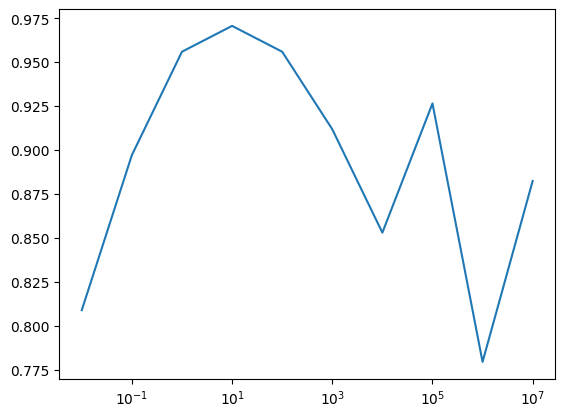

In [46]:
plt.figure()
plt.semilogx(reg_list1, reg_scores)

From the picture, I display the average accuracy as a measure of performance for this optimisation. 

To observe the limits of low and high hardness in a soft-margin linear SVM classifier, I train the model with different values of the regularization hyperparameter $\lambda$.

When $\lambda$ is too low, the SVM is not penalized enough for making classification errors, and as a result, it may overfit the training data. This means good accuracy for train and bad accuracy for test.

When $\lambda$ is too high, the SVM is highly penalized for making classification errors, and as a result, it may underfit the data. This means  bad accuracy for train and bad accuracy for test.


2.2.2
Linear SVM classifier tries to find a hyperplane that separates the data points of one class from the data points of the other class. To calculate the cosine of the angle between each pair of hyperplanes, we need to find the weight vectors for each hyperplane. Once we have the weight vectors, we can calculate the cosine of the angle between them.  
We have:
$$cosine = \frac{w_1\cdot w_2}{||w_1||||w_2||}$$


In [47]:
def cosi(vector_list):

    # vecter_list: different weights from different lambda
    # return: a cosine matrix for different vectors in vector_list 

    n = len(vector_list)
    cos_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            cos = vector_list[i]@vector_list[j]/(np.linalg.norm(vector_list[i])*np.linalg.norm(vector_list[j]))
            cos_matrix[i,j] = cos
    return cos_matrix
vectors = []
for lam in reg_list1:
    weights = sgd(X_train_intercept, y_train,lam, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5,  print_outcome=False)
    vectors.append(weights)

In [48]:
a = cosi(vectors)
pd.DataFrame(a) # to plot the heatmap, need to change matrix to data frame

,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,0.833326,0.922863,0.897314,0.905475,0.583232,0.486150,0.553468,0.642925
1,1.000000,1.000000,0.833290,0.922835,0.897293,0.905452,0.583213,0.486146,0.553462,0.642930
2,0.833326,0.833290,1.000000,0.914292,0.823986,0.822665,0.531337,0.423438,0.450338,0.495475
3,0.922863,0.922835,0.914292,1.000000,0.967747,0.977008,0.618875,0.522968,0.561154,0.642127
4,0.897314,0.897293,0.823986,0.967747,1.000000,0.990008,0.655205,0.543368,0.603686,0.703621
5,0.905475,0.905452,0.822665,0.977008,0.990008,1.000000,0.644812,0.541763,0.605345,0.700664
6,0.583232,0.583213,0.531337,0.618875,0.655205,0.644812,1.000000,0.936691,0.950335,0.945049
7,0.486150,0.486146,0.423438,0.522968,0.543368,0.541763,0.936691,1.000000,0.940600,0.878676
8,0.553468,0.553462,0.450338,0.561154,0.603686,0.605345,0.950335,0.940600,1.000000,0.932058
9,0.642925,0.642930,0.495475,0.642127,0.703621,0.700664,0.945049,0.878676,0.932058,1.000000


Text(0.5, 1.0, 'heatmap')

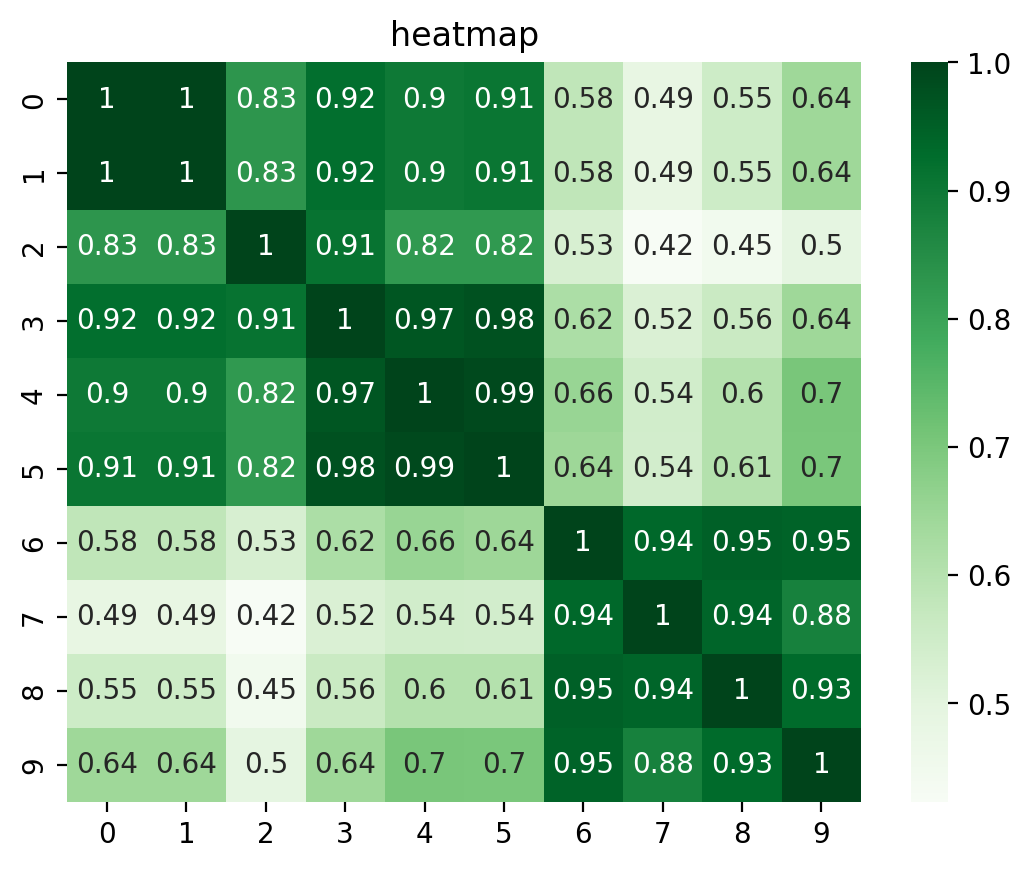

In [49]:
# use seaborn to plot heatmap 
import seaborn as sns
plt.figure(dpi=200)
sns.heatmap(data=a,cmap=plt.get_cmap('Greens'),annot=True)
plt.title('heatmap')

The cosine of the angle between two weight vectors gives us an idea of how similar or dissimilar the two hyperplanes are. If the cosine of the angle is close to 1, the two hyperplanes are parallel, and they have similar orientations.  If the cosine of the angle is away from 1, the two hyperplanes are orthogonal, and they have completely different orientations.   
From the heatmap, we can see the relationship of each hyperplane. Larger gap between $\lambda$ means larger angle between hyperplane.

2.2.3

In [50]:
def predict_svm(weight, X): 
    y = np.sign(X @ weight)
    return y

# I set Diabetes(1) positive and No diabetes(-1) negative, confusion matrix same as before
def confu_matrix_svm(y_pred, y_test):

    # return: accuracy, precision, F1_score
    TP, FP, FN, TN = 0,0,0,0
    num = len(y_test)
    for i in range(num):
        if y_pred[i] == 1:
            if y_test[i] == 1:
                TP +=1 
            else:
                FP +=1
        else:
            if y_test[i] == 1:
                FN += 1
            else:
                TN += 1
                       
    recall = TP / (TP + FN+1e-20)   # I add a very small value to the denominator to avoid 0 error        
    accuracy = (TP + TN) / num
    precision = TP / (TP + FP+1e-20)
    
    F1_score = 2 * precision * recall / (precision + recall+1e-20)
    
    return accuracy, precision, F1_score

In [51]:
X_in_test = data_test[data_test.columns[1:-1]]
y_out_test = data_test[data_test.columns[-1]]
X_std_test= (X_in_test-mu)/sigma # we should standardise out-of-sample input values by mean and variance of in-sample input to keep consistent
test = np.hstack((X_std_test, y_out_test[:, np.newaxis]))
X_test= test[:,:-1]
y_test = test[:, -1]
y_test = y_test.astype(float)
X_test_intercept = np.hstack((X_test, np.ones((len(X_test),1)) ))

C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\2754425746.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test = np.hstack((X_std_test, y_out_test[:, np.newaxis]))


Here, I use in-sample data to train the model and get the predicted weight: _weight0_, here I choose the optimal value of reg\_strength: _best\_reg_. And then I predict y for in-sample and out-of-sample data. And at last, I use my _confu\_matrix\_svm_ to calculate the accuracy, precision and F-score for in-sample data and out-of-sample data in order to compare and see if the model overfit.

In [52]:
weights0 = sgd(X_train_intercept, y_train,best_reg, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5,  print_outcome=False)
print(weights0)

[ 0.00327655  0.68733566 -0.00488307  0.08073145  0.01675369  0.00220698
 -0.00715875 -0.00466697  0.02673382  0.01450821  0.00662474 -0.00863239
  0.00175429 -0.9638    ]


In [53]:
# use the predicted w to get the predict y
y_predict = predict_svm(weights0, X_train_intercept)
y_pred_test = predict_svm(weights0, X_test_intercept)

In [54]:
# then use accuracy, precision and F-score to see the performance
print('train: accuracy, precision and F-score:',confu_matrix_svm(y_predict, y_train))
print('test: accuracy, precision and F-score:',confu_matrix_svm(y_pred_test, y_test))

train: accuracy, precision and F-score: (0.9120879120879121, 0.8846153846153846, 0.6571428571428571)
test: accuracy, precision and F-score: (0.9230769230769231, 0.8181818181818182, 0.6666666666666666)


Accuracy alone may not be enough, since the data is unbalanced(too many 'No diabetes'), so I also see precision and F-score. Precision and recall are useful for evaluating the performance of the model on positive an negative separately.  F-score gives us a single score that takes into account both precision and recall, which is useful when we want to balance the performance of the model on 'No diabetes' and 'Diabetes'. From our result, we can see our model is correct and not overfit. 
Precision measures the proportion of correct positive predictions('Diabetes') among all the positive predictions made by the model.

From the accuracy, precision and F-score, we can deduce that our model is not very good by soft-margin linear SVM. 

Summary: A soft-margin linear SVM classifier can have low precision and F-score if the dataset is imbalanced, meaning that there is a large difference in the number of instances. 

2.2.4

In the follwing, we implement a soft-margin kernelised SVM classifier with a non-linear kernel. Here, we use a $sigmoid$ kernel:
$$[K]_{ij} = k(x^{(i)}, x^{(j)}) = tanh(\sigma (x^{(i)}\cdot x^{(j)})+1)$$

In [55]:
# First we need a function to calculate the kernel given the data #
def kernel_matrix(X1,X2,sigma):

    n1,m1 = X1.shape
    n2,m2 = X2.shape
    kernel = np.zeros((n1,n2))

    # Here we define a sigmoid Function Kernel #
    for i in range(n1):
        for j in range(n2):
            kernel[i,j] = np.tanh(sigma*(X1[i] @ X2[j])+1) 
        
    return kernel

Having defined the kernel, we use this to compute the cost below.

In [56]:
def compute_cost_kernel(u, K, y, regul_strength=1e3,intercept=0):
    
    # Here I define the hinge cost with the kernel trick. NB: the intercept should be kept separate #
    
    distances = 1 - (y)*(K@u + intercept) 
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean()

    # calculate cost
    return 0.5 * np.dot(u,K@u) + hinge

# here I also get the gradient to b(intercept)
def calculate_cost_gradient_kernel(u, K_batch, y_batch, intercept, regul_strength=1e3):

    # if only one example is passed
    if type(y_batch) == np.float64 or type(y_batch) == np.int32:
        y_batch = np.asarray([y_batch])
        K_batch = np.asarray([K_batch])  # gives multidimensional array
    
    distance = 1 - (y_batch * (K_batch @ u + intercept)) 
    dw = np.zeros(len(u))
    db = 0
    dj = 0
    # define the gradient with the hinge loss #
    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = K_batch@u 
        else:
            di = K_batch@u - (regul_strength * y_batch[ind] * K_batch[ind]) 
            dj = -regul_strength * y_batch[ind]
        dw += di 
        db += dj
        
 

    return dw/len(y_batch), db/len(y_batch)


# We can now use the functions above in SGD.
def sgd_kernel(K, y, batch_size=32, max_iterations=4000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=12, print_outcome=False):

    # initialise zero u and intercept
    u = np.zeros(K.shape[1])
    intercept=0
    
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        K_b, y_b = K[batch_idx], y[batch_idx]
        for ki, yi in zip(K_b, y_b):
            dw, db = calculate_cost_gradient_kernel(u, ki, yi, intercept, regul_strength)
            u = u - (learning_rate * dw)
            intercept = intercept - (learning_rate * db) # update step for intercept
            
            
        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kernel(u, K, y, regul_strength)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return u, intercept
            
            prev_cost = cost
            nth += 1
    
    return u, intercept

In [57]:
intercept = []
u_list = []
for sigma in [0.01, 0.1, 1, 2]:
    
    print('For sigma = ' + str(sigma))
    K_train = kernel_matrix(X_train,X_train, sigma)
    
    u,b = sgd_kernel(K_train, y_train, batch_size=128, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, regul_strength=10, print_outcome=False)
    print('b = ' + str(b))
    intercept.append(b)
    u_list.append(u)
    def score_soft(u, X, y, sigma, intercept):
        ## now I define the kernel containing test and train data ##
        K_test = kernel_matrix(X, X_train, sigma) # keep same dimension
        
        y_preds = np.sign(K_test@u + intercept) ## <-- SOLUTION
    
        return np.mean(y_preds == y)
    print("Accuracy on training set: {}".format(score_soft(u, X_train, y_train, sigma, b)))

For sigma = 0.01
b = -0.9758999999999088
Accuracy on training set: 0.8388278388278388
For sigma = 0.1
b = -1.0737999999998982
Accuracy on training set: 0.9304029304029304
For sigma = 1
b = -1.546499999999846
Accuracy on training set: 0.9853479853479854
For sigma = 2
b = -1.4612999999998555
Accuracy on training set: 0.9926739926739927


In [58]:
print(len(u_list))
print(intercept)

4
[-0.9758999999999088, -1.0737999999998982, -1.546499999999846, -1.4612999999998555]


Here, sigma is the hyperparameter that controls the steepness of the sigmoid function. A small value of a will result in a very shallow sigmoid function, which may not be able to capture complex non-linear relationships in the data and cause underfitting. On the other hand, a large value of a will result in a very steep sigmoid function, which may lead to overfitting of the data.

2.2.5

In [59]:
# use my predicted u and intercept to predict y for out-of-sample data
K_train1 = kernel_matrix(X_train,X_train, sigma=0.01)
K_train2 = kernel_matrix(X_train,X_train, sigma=0.1)
K_train3 = kernel_matrix(X_train,X_train, sigma=1)
K_train4 = kernel_matrix(X_train,X_train, sigma=2)

K_test1 = kernel_matrix(X_test, X_train, sigma=0.01)
K_test2 = kernel_matrix(X_test, X_train, sigma=0.1)
K_test3 = kernel_matrix(X_test, X_train, sigma=1)
K_test4 = kernel_matrix(X_test, X_train, sigma=2)

y_pred1 = np.sign(K_train1@u_list[0] + intercept[0])
y_pred2 = np.sign(K_train2@u_list[1] + intercept[1])
y_pred3 = np.sign(K_train3@u_list[2] + intercept[2])
y_pred4 = np.sign(K_train4@u_list[3] + intercept[3])

y_pred_test1 = np.sign(K_test1@u_list[0] + intercept[0])
y_pred_test2 = np.sign(K_test2@u_list[1] + intercept[1])
y_pred_test3 = np.sign(K_test3@u_list[2] + intercept[2])
y_pred_test4 = np.sign(K_test4@u_list[3] + intercept[3])



In [60]:
print(r'train: accuracy, precision and F-score if sigma = 0.01:',confu_matrix_svm(y_pred1, y_train))
print(r'test: accuracy, precision and F-score if sigma = 0.01:',confu_matrix_svm(y_pred_test1, y_test))

print(r'train: accuracy, precision and F-score if sigma = 0.1:',confu_matrix_svm(y_pred2, y_train))
print(r'test: accuracy, precision and F-score if sigma = 0.1:',confu_matrix_svm(y_pred_test2, y_test))

print(r'train: accuracy, precision and F-score if sigma = 1:',confu_matrix_svm(y_pred3, y_train))
print(r'test: accuracy, precision and F-score if sigma = 1:',confu_matrix_svm(y_pred_test3, y_test))

print(r'train: accuracy, precision and F-score if sigma = 2:',confu_matrix_svm(y_pred4, y_train))
print(r'test: accuracy, precision and F-score if sigma = 2:',confu_matrix_svm(y_pred_test4, y_test))



train: accuracy, precision and F-score if sigma = 0.01: (0.8388278388278388, 0.0, 0.0)
test: accuracy, precision and F-score if sigma = 0.01: (0.8632478632478633, 0.0, 0.0)
train: accuracy, precision and F-score if sigma = 0.1: (0.9304029304029304, 0.8787878787878788, 0.7532467532467532)
test: accuracy, precision and F-score if sigma = 0.1: (0.9230769230769231, 0.8181818181818182, 0.6666666666666666)
train: accuracy, precision and F-score if sigma = 1: (0.9853479853479854, 0.9761904761904762, 0.9534883720930233)
test: accuracy, precision and F-score if sigma = 1: (0.9230769230769231, 0.7333333333333333, 0.7096774193548386)
train: accuracy, precision and F-score if sigma = 2: (0.9926739926739927, 1.0, 0.9767441860465117)
test: accuracy, precision and F-score if sigma = 2: (0.8974358974358975, 0.6111111111111112, 0.6470588235294118)


In [61]:
# then use accuracy, precision and F-score to see the performance
print('train linear: accuracy, precision and F-score:',confu_matrix_svm(y_predict, y_train))
print('test linear: accuracy, precision and F-score:',confu_matrix_svm(y_pred_test, y_test))

train linear: accuracy, precision and F-score: (0.9120879120879121, 0.8846153846153846, 0.6571428571428571)
test linear: accuracy, precision and F-score: (0.9230769230769231, 0.8181818181818182, 0.6666666666666666)


In [62]:
intercept

[-0.9758999999999088,
 -1.0737999999998982,
 -1.546499999999846,
 -1.4612999999998555]

Compare the accuracy, precision and F-score with 2.2.3, , we can find that sigma = 0.1 is the best to choose. When sigma = 0.01, the model will underfit due to low accuracy, precision and F-score for test and train data. When sigma =1 or 2, the model will overfit due to high accuracy, precision and F-score for train data and low accuracy, precision and F-score for test data.

In general, a smaller value of sigma will result in a smoother decision boundary and may be better suited for datasets with a high degree of noise or with many outliers. If $\sigma = 0.1$ is a better parameter for a sigmoid kernelized SVM, then it is likely that the data is relatively dense and clustered.  This allows the kernel function to capture the non-linear relationships between data points in a smoother way, without overfitting or being too sensitive to individual data points.

If we want to further improve our data, we can try sigma near 0.1 and do grid search to get the better sigma. So a proper kernel for SVM classifier will improve the performance of the model.

Also, the intercept "1" in the sigmoid function can also be a hyperparameter to change to improve the performance of the kernelised SVM. And the batch size, learning rate and so on in stochastic gradient descent can also be optimised. 



## Task 3: Mastery component  (25 marks)

**Please delete this section if you are not a master student**



#### 3.1  Bias and variance in linear regression (12 marks)
3.1.1

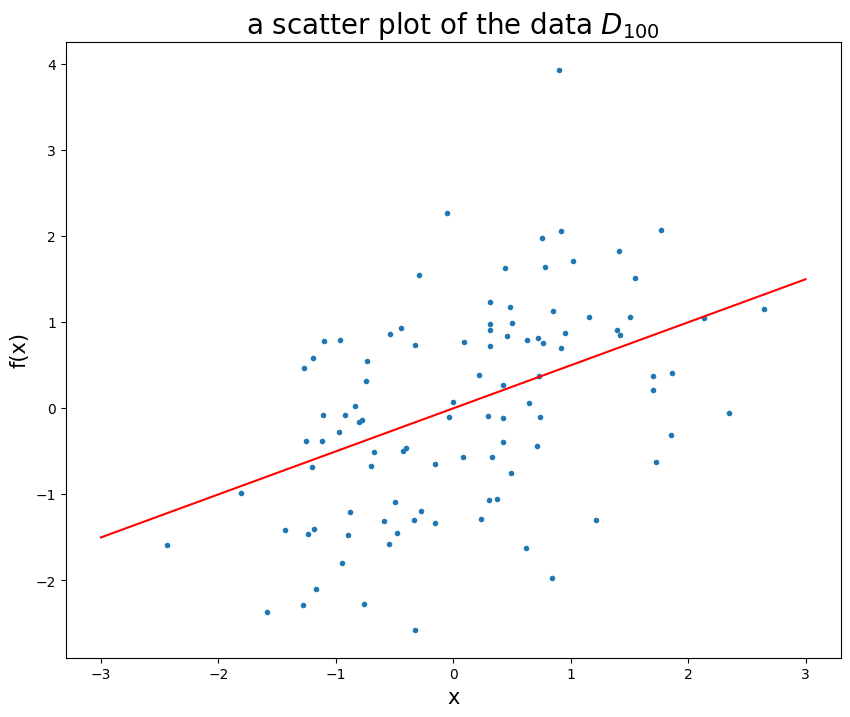

In [63]:
def syntheitic_dataset(N):
    """
    want to get a data set with noise
    N: number of points
    """
    x = np.random.normal(0, 1, N)
    eps = np.random.normal(0, 1, N)
    fx = 0.5*x + eps
    return np.array([x, fx])

D = syntheitic_dataset(100)
# need the original data without noise: true value
xlist = np.linspace(-3,3,30)
ylist = 0.5 * xlist

# plot the scatter plot
plt.figure(figsize = (10,8))
plt.scatter(D[0], D[1], marker='.')
plt.plot(xlist, ylist, 'r')
plt.xlabel('x', size = 15)
plt.ylabel('f(x)', size = 15)
plt.title(r'a scatter plot of the data $D_{100}$', size = 20)
plt.show()

In [64]:
y = D[1].reshape(-1,1)
X = D[0].reshape(-1,1)
N, D = X.shape


In [65]:
X_aug = np.hstack([np.ones((N,1)), X])
beta_estimate = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y # do linear regression by minimising loss function
beta_estimate

array([[-0.0601926 ],
       [ 0.57891343]])

In [66]:
y_pred = X_aug @ beta_estimate

#### report of 3.1.1:
My predicted beta as gardient is 0.57891343 and an intercept beta -0.0601926.

3.1.2

In [67]:
def linear_regression_1D(D):

    # D: N = D times from the linear model
    # return the gradient beta

    X = D[0].reshape(-1,1)
    y = D[1].reshape(-1,1)
    N, D = X.shape
    X_aug = np.hstack([np.ones((N,1)), X])
    beta = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y

    return beta[1][0]

def bias(beta_star):
    
    # return: bias of beta

    return np.average(beta_star) - 0.5

def variance(beta_star):
    
    # return: variance of beta

    return np.average((beta_star - np.average(beta_star)) ** 2)

def MSE(beta_star):
    
    # return: MSE of beta

    return np.average((beta_star - 0.5) ** 2)

def analysis(N):
    
    # N : how many samples
    # return: bias, variance and MSE of beta

    beta_star = np.zeros(100)
    for i in range(100):
        D = syntheitic_dataset(N)
        beta_star[i] = linear_regression_1D(D)

    b = bias(beta_star)
    var = variance(beta_star)
    M = MSE(beta_star)
    return b, var, M

In [68]:
bias100, var100, mse100 = analysis(100)
print('bias for D100:', bias100,'variance for D100:', var100, 'MSE for D100:', mse100)
MSE2 = bias100**2 + var100
print('MSE from bias^2+var', MSE2, 'MSE from predict value and true value formula', mse100)

bias for D100: 0.0032564994801594915 variance for D100: 0.009478065712151785 MSE for D100: 0.009488670501016063
MSE from bias^2+var 0.009488670501016063 MSE from predict value and true value formula 0.009488670501016063


#### report of 3.1.2:
From above, we have shown, the following are equal:

$$MSE = Var + Bias^2 = E((predict - true)^2)$$

3.1.3

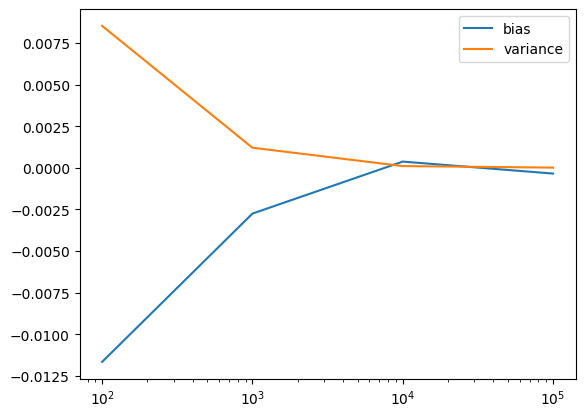

In [80]:
N_array = np.array([100, 1000, 10000, 100000])
bias_var = np.zeros((2, 4))

for i in range(4):
    b, var, M = analysis(N_array[i])
    bias_var[0, i] = b
    bias_var[1, i] = var

plt.semilogx(N_array, bias_var[0], label = 'bias')
plt.semilogx(N_array, bias_var[1], label = 'variance')
plt.legend()
plt.show()


#### report of 3.1.3:
We can see the bias and variance are trend to 0. We know the fomula:
$$Var = E[(\beta - \beta^*)(\beta - \beta^*)^T] = (X^TX)^{-1}\sigma^2$$ 
We know, as sample numbers increasing, $(X^TX)$ will be larger and $(X^TX)^{-1}$ will be smaller and trend to zero.

By Central Limit Theorem, 

$$Z = lim_{n\rightarrow+\infty}\sqrt{n}\frac{\overline {X_n}-\mu}{\sigma}$$

By CLT, if the sample size is large enough, the sampling distribution of the sample mean height will be approximately normal., the sampling distribution of the mean of the sample will approach a normal distribution. With increasing sample size, the bias of the sample mean estimator decreases. As sample size increases, the sample mean becomes a more accurate estimate of the population mean, and therefore, the bias decreases. Variance decreases as well.


#### 3.2  Comparison between Logistic Regression and Naive Bayes (13 marks)
3.2.1

In [70]:
def confusion_matrix(y_predict, y_test):
    TP, FP, FN, TN = 0,0,0,0
    num = len(y_test)
    for i in range(num):
        if y_predict[i] == 0:
            if y_test[i] == 0:
                TP +=1
            else:
                FP +=1
        else:
            if y_test[i] == 0:
                FN += 1
            else:
                TN += 1

    try:   
        recall = TP / (TP + FN)
    except ZeroDivisionError:
        recall = 0
    try:        
        precision = TP / (TP + FP)
    except ZeroDivisionError:
        precision = 0
    try:
        F1_score = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        F1_score = 1
    
    return recall, precision, F1_score


def logistic_func(x):
    return 1 / (1 + np.exp(-x.astype(np.float32)))


def predict_log(X, beta, beta_0):
  y_log = logistic_func(X.T @ beta + beta_0)  
  return y_log.squeeze()


def propagate(X, y, beta, beta_0, sample_weight = None):

    """
    Arguments:
    X: data of size (d, n)
    y: true label vector of size (1, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar

    Returns:
    cost: negative log-likelihood cost for logistic regression
    dbeta: gradient of the loss with respect to beta
    dbeta_0: gradient of the loss with respect to beta_0
    """
    n = X.shape[1]
    y_log = predict_log(X, beta, beta_0)

    # cost function
    cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()

    # derivatives
    if type(sample_weight) is np.ndarray:
        dbeta = (1/n * (X @ sample_weight @ (y_log - y))).reshape(-1, 1)
        dbeta_0 =  (sample_weight @ (y_log - y)).mean()
    else:
        dbeta = (X * (y_log - y)).mean(axis=1).reshape(-1, 1)
        dbeta_0 =  (y_log - y).mean()
        
    # store gradients in a dictionary
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}

    return grads, cost


def optimise(X, y, beta, beta_0, num_iterations=1000, learning_rate=0.005, sample_weight=None):

    """
    Arguments:
    X: data of size (d, n)
    y: true label vector of size (1, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar
    num_iterations: number of iterations gradient descent shall update the parameters
    learning_rate: step size in updating procedure
    print_cost: whether to print the cost every 100 iterations or not

    Returns:
    params: dictionary containing the parameters beta and offset beta_0
    grads: dictionary containing the gradients
    costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
    """
    costs = []
        
    for i in range(num_iterations):

        # calculate cost and gradients (hint: use your existing functions)
        grads, cost = propagate(X, y, beta, beta_0, sample_weight)  
        
        # retrieve derivatives from grads
        dbeta = grads["dbeta"]
        dbeta_0 = grads["dbeta_0"]
        
        # updating procedure
        beta = beta - learning_rate * dbeta  
        beta_0 = beta_0 - learning_rate * dbeta_0  
        
        # record the costs
        if i % 100 == 0:
            costs.append(cost)
    
    # save parameters and gradients in dictionary
    params = {"beta": beta, "beta_0": beta_0}
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
    
    return params, grads, costs


def initialise(d):

    """    
    Argument:
    d: size of the beta vector (or number of parameters)
    
    Returns:
    beta: initialised vector of shape (d, 1)
    beta_0: initialised scalar (corresponds to the offset)
    """

    beta = np.zeros(shape=(d, 1), dtype=np.float32)
    beta_0 = 0

    return beta, beta_0


def predict_logistic(X_test, beta, beta_0):
    
    """
    Arguments:
    X_test: test data of size (d, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar

    Returns:
    y_pred: vector containing all binary predictions (0/1) for the examples in X_test
    """

    n = X_test.shape[1]
    y_pred = np.zeros((1,n))
    beta = beta.reshape(X_test.shape[0], 1)

    # compute vector y_log predicting the probabilities
    y_log = predict_log(X_test, beta, beta_0)

    y_pred = y_log.round().reshape(1, -1) 

    return y_pred


def accuracy(y_predict, y_true):
    return np.mean(y_predict==y_true)


def model_logistic(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.5, sample_weight=None):
    # initialize parameters with zeros
    beta, beta_0 = initialise(X_train.shape[0])

    # gradient descent
    parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, sample_weight)

    # retrieve parameters beta and beta_0 from dictionary "parameters"
    beta = parameters["beta"]
    beta_0 = parameters["beta_0"]

    # predict test and train set examples
    y_pred_test = predict_logistic(X_test, beta, beta_0)
    y_pred_train = predict_logistic(X_train, beta, beta_0)

    acc_in_sample = accuracy(y_pred_train[0], y_train)
    acc_out_sample = accuracy(y_pred_test[0], y_test)

    recall, precision, f_score = confusion_matrix(y_pred_test[0], y_test)


    return acc_in_sample, acc_out_sample, f_score, recall, precision

def str_to_num(s):
    s = s.replace(',', '.')
    return float(s)

def process_data(path):
    # deal with data in order to use easily later
    a = pd.read_csv(path)
    X = a[a.columns[1:-1]].to_numpy()
    for i in range(np.shape(X)[0]):
        for j in range(np.shape(X)[1]):
            if isinstance(X[i, j], str):
                X[i, j] = str_to_num(X[i, j])

    y = a[a.columns[-1]]
    y = pd.Categorical(y).codes
    return X, y


In [71]:
def cal_lk(x, sigma, mu):
    # calculate the likelihood of samlples using given sigma and mu
    x = x.astype(np.float32)
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma))

def train(X, y):

    # not strictly necessary, but this ensures we have clean input
    n = X.shape[0]

    # reorder X as a 2-dimensional array; each dimension contains data examples of only one of our two classes
    X_by_class = [X[y==c] for c in np.unique(y)]
    # define prior
    prior = np.array([len(X_class) / n for X_class in X_by_class])

    #For each calsses, calculate the sigma and mu of the samples
    sigma_list = []
    mu_list = []
    for X_q in X_by_class:
        sigma_temp = []
        mu_temp = []
        for i in range(len(X_q[0])):
            mu = np.mean(X_q[:, i])
            sigma = np.sqrt(1/(len(X_q[:, i])-1) * np.sum((X_q[:, i]-mu)**2))
            sigma_temp.append(sigma)
            mu_temp.append(mu)
        sigma_list.append(sigma_temp)
        mu_list.append(mu_temp)

    #return the prior, sigma, and mu associated with the dataset
    return prior, sigma_list, mu_list

def predict_proba(X, y, prior, sigma_list, mu_list):
    # loop over each observation to calculate conditional probabilities
    class_numerators = np.zeros(shape=(X.shape[0], prior.shape[0]))
    lk_X = []
    
    # calculate the likelihood for each sample
    for n in range(len(sigma_list)):
        lk = np.zeros(X.shape)
        for i in range(X.shape[1]):
            # calcualte the likelihood of each feature and store it in ndarray ld
            lk[:, i] = cal_lk(X[:, i], sigma_list[n][i], mu_list[n][i])
        lk = lk.prod(axis=1)
        lk_X.append(lk)

    for i in range(X.shape[0]):
        # combine likelihood and prior to numerator
        class_numerators[i] = np.array([lk_X[0][i], lk_X[1][i]]) * prior  

    normalize_term = class_numerators.sum(axis=1).reshape(-1, 1)
    posteriors = class_numerators / normalize_term
    
    return posteriors


# use trained naive bayes model for perdiction
def predict_naive(X, y, prior, sigma_list, mu_list):
    return predict_proba(X, y, prior, sigma_list, mu_list).argmax(axis=1)


# Train Naive-Bayes model with training samples and test it with test samples
def model_naive(X_train, y_train, X_test, y_test):
    prior, sigma_list, mu_list = train(X_train, y_train)
    y_pred_train = predict_naive(X_train, y_train, prior, sigma_list, mu_list)
    y_pred_test = predict_naive(X_test, y_test, prior, sigma_list, mu_list)

    acc_in_sample = accuracy(y_pred_train, y_train)
    acc_out_sample = accuracy(y_pred_test, y_test)
    recall, precision, f_score = confusion_matrix(y_pred_test, y_test)

    #print("training accuracy: {} %".format(accuracy(y_pred_train, y_train)*100))
    #print("test accuracy: {} %".format(accuracy(y_pred_test, y_test)*100))

    return acc_in_sample, acc_out_sample, f_score, recall, precision




In [72]:
X_train, y_train = process_data('diabetes_samples.csv')
X_train = X_train.T

X_test, y_test = process_data('diabetes_test.csv')
X_test = X_test.T


d1 = model_logistic(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.5, sample_weight=None)

X_train, y_train = process_data('diabetes_samples.csv')

X_test, y_test = process_data('diabetes_test.csv')

d2 = model_naive(X_train, y_train, X_test, y_test)


print(d1)
print(d2)

(0.9120879120879121, 0.9230769230769231, 0.7096774193548386, 0.6875, 0.7333333333333333)
(0.8608058608058609, 0.905982905982906, 0.7027027027027026, 0.8125, 0.6190476190476191)


C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: divide by zero encountered in log
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: invalid value encountered in multiply
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(np.float32)))
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\3895238648.py:52: RuntimeWarning: invalid value encountered in divide
  posteriors = class_numerators / normalize_term


After observing, we can see, F-score for these two model are similar. And accuracy for logistic model is better, because the data is unbalanced. Naive bayes has a better recall because this model is to compare two probability of each class and choose a larger one. It is no relationship for the weight. Logistic regression has a threshold, so it will be affected by weights.

For the test dataset, the Logistic Regression produces a higher accuracy, f-score, and precision than Naive-Bayes Classifier. Thus, from this point of view, the Logistic Regression seems to be a better classifier compared to Naive Bayes. However, if we look at the recall (true positive rate), we can observe that the Naive-Bayes generate a higher recall, indicating that the Naive-Bayes Classifier does better in identifying the positive class than the Logistic regression. Thus, if our aim is to select 'Diabetes' patients, Naive-Bayes might be a better classifier.

3.2.2

In [73]:
# Define a sample function for calculating sample weights
def cal_sample_weight(y):
    w = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        if y[i]:
            w[i, i] = 1 - np.count_nonzero(y)/len(y)
        else:
            w[i, i] = np.count_nonzero(y)/len(y)

    return w

# Define a function for bootstrapping
# M_size represent the size of sub samples
def bootstrapping(M_size, X, y):
    training_indexes = np.arange(M_size)
    sample_indexes = np.random.choice(training_indexes, M_size, replace=True)
    X_sample = X[sample_indexes, :]
    y_sample = y[sample_indexes]
    return X_sample, y_sample

# Apply the bootstrapping, calculate the recall and accuracy of Logistic Regression and Naive-Bayes
def apply_bootstrapping(M_size, print_acc=True, apply_sample_weight=False):
    # Total times of training is 10
    times = 10
    X_train, y_train = process_data('diabetes_samples.csv')
    X_test, y_test = process_data('diabetes_test.csv')

    # Define the array to store the result of accuracy, f_score, and recall
    logistic_acc_in = np.zeros(times)
    logistic_acc_out = np.zeros(times)
    logistic_f_score = np.zeros(times)
    logistic_recall = np.zeros(times)
    logistic_precision = np.zeros(times)

    naive_acc_in = np.zeros(times)
    naive_acc_out = np.zeros(times)
    naive_f_score = np.zeros(times)
    naive_recall = np.zeros(times)
    naive_precision = np.zeros(times)

    # calculate the accuracy, f_score and recall with and without sample weights
    if apply_sample_weight:
        for i in range(times):
            X_sample, y_sample = bootstrapping(M_size, X_train, y_train)
            sample_weights = cal_sample_weight(y_sample)

            logistic_acc_in[i], logistic_acc_out[i], logistic_f_score[i], logistic_recall[i], logistic_precision[i] = model_logistic(X_sample.T, y_sample, X_test.T, y_test, num_iterations=2000, learning_rate=0.5, sample_weight=sample_weights)
            naive_acc_in[i], naive_acc_out[i], naive_f_score[i], naive_recall[i], naive_precision[i] = model_naive(X_sample, y_sample, X_test, y_test)
    else:
        for i in range(times):
            X_sample, y_sample = bootstrapping(M_size, X_train, y_train)    
            
            logistic_acc_in[i], logistic_acc_out[i], logistic_f_score[i], logistic_recall[i], logistic_precision[i] = model_logistic(X_sample.T, y_sample, X_test.T, y_test, num_iterations=2000, learning_rate=0.5)
            naive_acc_in[i], naive_acc_out[i], naive_f_score[i], naive_recall[i], naive_precision[i] = model_naive(X_sample, y_sample, X_test, y_test)
    
    naive_acc_out_mean = np.mean(naive_acc_out)
    naive_f_score_mean = np.mean(naive_f_score)
    naive_recall_mean = np.mean(naive_recall)
    logistic_acc_out_mean = np.mean(logistic_acc_out)
    logistic_f_score_mean = np.mean(logistic_f_score)
    logistic_recall_mean = np.mean(logistic_recall)

    if print_acc:
        print("Out of sample accuracy for Naive: {} %".format(naive_acc_out_mean*100))
        print("Out of sample accuracy for Logistic: {} %".format(logistic_acc_out_mean*100))

    return naive_acc_out_mean,naive_f_score_mean, naive_recall_mean, logistic_acc_out_mean, logistic_f_score_mean, logistic_recall_mean

# Plot the accuracy, recall curve
def plot_acc(apply_sample_weight=False):
    M_size = np.arange(13, 274, 20)
    print(M_size)
    naive_acc_list = []
    logistic_acc_list = []
    naive_re_list = []
    logistic_re_list = []
    naive_f_list = []
    logistic_f_list = []

    # Calculate the accuracy and recall for different M szie
    for i in range(len(M_size)):
        naive_acc, naive_f, naive_re, logistic_acc, logistic_f, logistic_re = apply_bootstrapping(M_size[i], print_acc=False, apply_sample_weight=apply_sample_weight)
        naive_acc_list.append(naive_acc)
        naive_re_list.append(naive_re)
        naive_f_list.append(naive_f)
        logistic_acc_list.append(logistic_acc)
        logistic_re_list.append(logistic_re)
        logistic_f_list.append(logistic_f)
    
    # plot the accuracy and recall against M size
    plt.plot(M_size, naive_acc_list, label = 'Naive-Bayes')
    plt.plot(M_size, logistic_acc_list, label = 'Logistic')
    plt.plot([0, 275], [0.83, 0.83], linestyle = '--')
    plt.legend()
    plt.show()

    plt.plot(M_size, naive_re_list, label = 'Naive-Bayes')
    plt.plot(M_size, logistic_re_list, label = 'Logistic')
    plt.legend()
    plt.show()

    plt.plot(M_size, naive_f_list, label = 'Naive-Bayes')
    plt.plot(M_size, logistic_f_list, label = 'Logistic')
    plt.legend()
    plt.show()


[ 13  33  53  73  93 113 133 153 173 193 213 233 253 273]


C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: divide by zero encountered in log
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: invalid value encountered in multiply
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(np.float32)))
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\3895238648.py:52: RuntimeWarning: invalid value encountered in divide
  posteriors = class_numerators / normalize_term
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\3895238648.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma))
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\3895238648.py:4: RuntimeWarning: divide by zero encoun

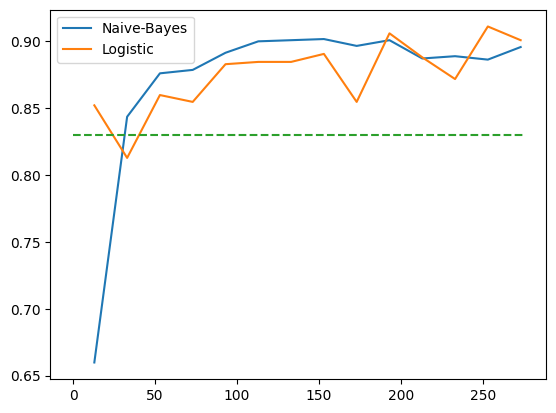

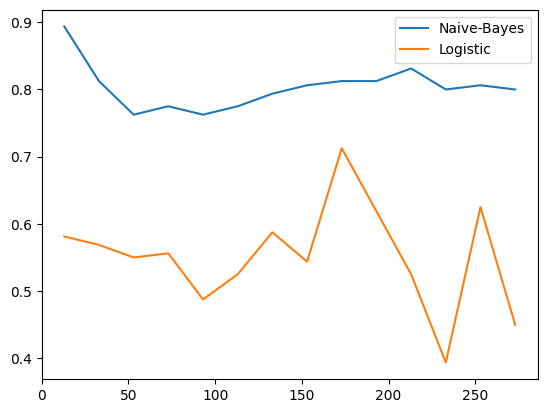

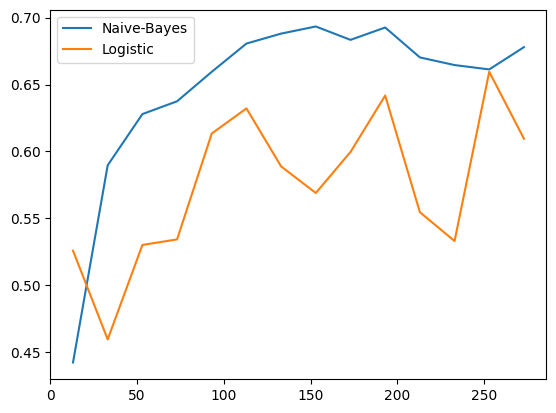

In [75]:
plot_acc()

Figure 1 shows the in-sample accuracy of Naive-Bayes Classifier and unweighted Logistic Regression. We can observe that the accuracy for Naive-Bayes Classifier drops drmatically at M' around 25 to 30, while the Logistic Regression's accuracy decreases steadily from around 90% to 85%. The f socre also generates similar result. This indicates that the Naive-Bayes Classifier will not provide a good perdiction when M' size is smaller than 30.

3.2.3

In [76]:
X_train, y_train = process_data('diabetes_samples.csv')
sample_weights = cal_sample_weight(y_train)

X_train = X_train.T

X_test, y_test = process_data('diabetes_test.csv')
X_test = X_test.T


d = model_logistic(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.5, sample_weight=sample_weights)
print(d)


C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(np.float32)))
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: divide by zero encountered in log
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: invalid value encountered in multiply
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()


(0.9267399267399268, 0.9230769230769231, 0.6666666666666666, 0.5625, 0.8181818181818182)


[ 13  33  53  73  93 113 133 153 173 193 213 233 253 273]


C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(np.float32)))
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: divide by zero encountered in log
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\228459832.py:59: RuntimeWarning: invalid value encountered in multiply
  cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\3895238648.py:52: RuntimeWarning: invalid value encountered in divide
  posteriors = class_numerators / normalize_term
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\3895238648.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma))
C:\Users\a1892\AppData\Local\Temp\ipykernel_13812\3895238648.py:4: RuntimeWarning: divide by zero encoun

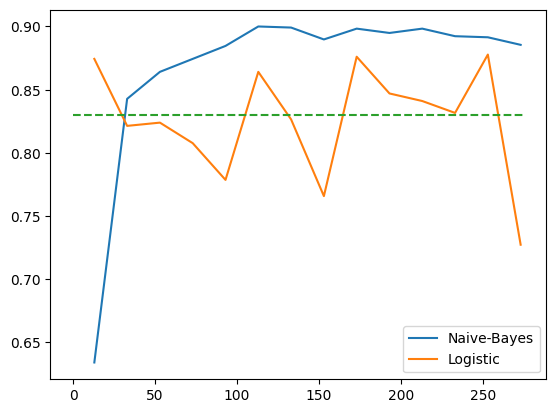

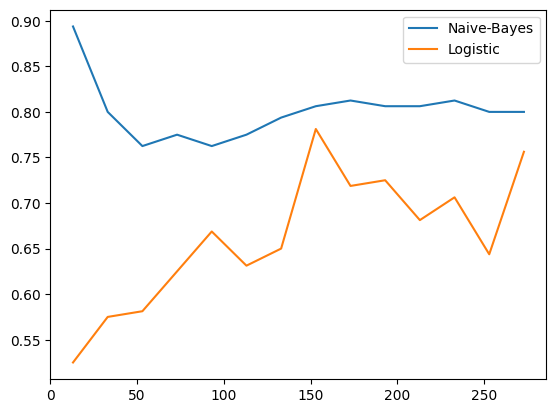

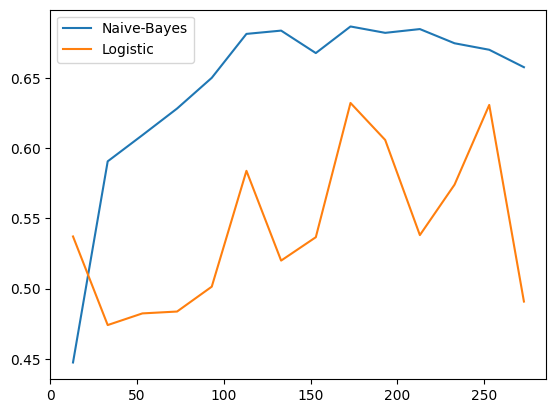

In [78]:
plot_acc(apply_sample_weight=True)

After adding weights, logistic model has slight improvement, and we can find naive bayes also have better performance. After observing the data, a lot of data features has normal distribution, so maybe naive bayes has better performance.